In [139]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

In [140]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [141]:
path = 'C:/Hariom Mehta/Academics/Masters MIS docs/SEM 3/BIA 656/Final Project/sofr_.csv'
new_df = pd.read_csv(path, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
new_df = new_df.asfreq(pd.infer_freq(new_df.index))

In [212]:
rate = new_df['RATE\n(PERCENT)']
rate.tail(20) 
rate = rate.fillna(method='ffill')
rate = rate.pct_change().dropna()

Text(0.5, 1.0, 'SOFR Returns')

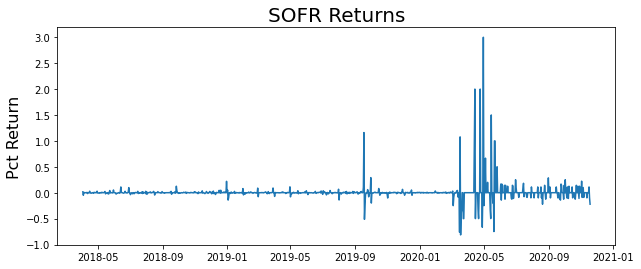

In [143]:

plt.figure(figsize=(10,4))
plt.plot(rate)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SOFR Returns', fontsize=20)

In [144]:
#ljung box test
res = sm.tsa.ARMA(rate, (1,1)).fit(disp=-1)
#sm.stats.acorr_ljungbox(res.resid, lags=[10])
sm.stats.acorr_ljungbox(res.resid, lags=[5])
# pvalue is high, reject null hypo, there is no serial corelation 


(array([9.09176056]), array([0.10545964]))

In [145]:
sm.stats.diagnostic.het_arch(res.resid)
#Lagrange multiplier test statistic, p-value for Lagrange multiplier test

#fstatistic for F test, alternative version of the same test based on F test for the parameter restriction

#p value is very low, reject nul hypo, there is arch effects

(195.40991262629154,
 8.9747330147148e-30,
 10.941724907864868,
 8.140202928976299e-34)

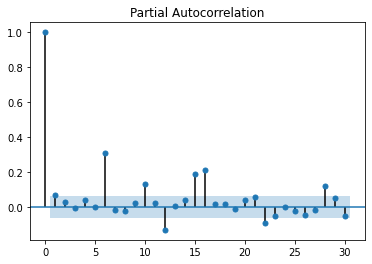

In [146]:
plot_pacf(rate**2)
plt.show()

In [147]:
model = arch_model(rate, p=1, q=1, rescale=False)
model_fit = model.fit()
model_fit.summary()

AIC:	-2204.30,OMEGA, alpha[1],beta[1] is significant

Iteration:      1,   Func. Count:      6,   Neg. LLF: -1093.4878918059114
Iteration:      2,   Func. Count:     19,   Neg. LLF: -1103.8756353444394
Iteration:      3,   Func. Count:     31,   Neg. LLF: -1106.150351959181
Iteration:      4,   Func. Count:     43,   Neg. LLF: -1106.1516555694807
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1106.1516456430495
            Iterations: 8
            Function evaluations: 43
            Gradient evaluations: 4


C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:         RATE
(PERCENT)   R-squared:                      -0.003
Mean Model:             Constant Mean   Adj. R-squared:                 -0.003
Vol Model:                      GARCH   Log-Likelihood:                1106.15
Distribution:                  Normal   AIC:                          -2204.30
Method:            Maximum Likelihood   BIC:                          -2184.83
                                        No. Observations:                  961
Date:                Sun, Dec 06 2020   Df Residuals:                      957
Time:                        04:56:17   Df Model:                            4
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.1573e-03  3.752e-03     -0.308      0.758 [-8.512e-03,6.197e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.5798e-04  3.102e-04      2.121  3.389e-02 [5.008e-05,1.266e-03]
alpha[1]       0.2000      0.104      1.929  5.369e-02  [-3.174e-03,  0.403]
beta[1]        0.7800  5.552e-02     14.050  7.692e-45     [  0.671,  0.889]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [148]:
model = arch_model(rate, p=2, q=1, rescale=False)
model_fit = model.fit()
model_fit.summary()

#AIC:	1113.88 , alpha[1] is significant, but alpha[2], beta[1] is not significant

Iteration:      1,   Func. Count:      7,   Neg. LLF: -1054.3736245269765
Iteration:      2,   Func. Count:     21,   Neg. LLF: -1064.3509478254443
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1064.350935360649
            Iterations: 6
            Function evaluations: 21
            Gradient evaluations: 2


C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:         RATE
(PERCENT)   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:                1064.35
Distribution:                  Normal   AIC:                          -2118.70
Method:            Maximum Likelihood   BIC:                          -2094.36
                                        No. Observations:                  961
Date:                Sun, Dec 06 2020   Df Residuals:                      956
Time:                        04:57:12   Df Model:                            5
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -5.1047e-04  4.898e-03     -0.104      0.917 [-1.011e-02,9.089e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.5725e-04  4.034e-04      1.629      0.103 [-1.334e-04,1.448e-03]
alpha[1]       0.1000  8.617e-02      1.161      0.246   [-6.889e-02,  0.269]
alpha[2]       0.1000      0.103      0.969      0.333      [ -0.102,  0.302]
beta[1]        0.7800  6.014e-02     12.970  1.814e-38      [  0.662,  0.898]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [150]:
model = arch_model(rate, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: -1105.758976095366
Iteration:      2,   Func. Count:     24,   Neg. LLF: -1117.8408827036717
Iteration:      3,   Func. Count:     38,   Neg. LLF: -1117.85698669679
Iteration:      4,   Func. Count:     51,   Neg. LLF: -1117.8730526391303
Iteration:      5,   Func. Count:     62,   Neg. LLF: -1119.2433982491368
Iteration:      6,   Func. Count:     77,   Neg. LLF: -1120.608886851487
Iteration:      7,   Func. Count:     87,   Neg. LLF: -1125.5505659484152
Iteration:      8,   Func. Count:     97,   Neg. LLF: -1132.20198460993
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1132.2019863878452
            Iterations: 12
            Function evaluations: 97
            Gradient evaluations: 8


C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03286. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:         RATE
(PERCENT)   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:                1132.20
Distribution:                  Normal   AIC:                          -2252.40
Method:            Maximum Likelihood   BIC:                          -2223.20
                                        No. Observations:                  961
Date:                Sun, Dec 06 2020   Df Residuals:                      955
Time:                        04:57:50   Df Model:                            6
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.6172e-04  3.246e-03     -0.235      0.814 [-7.123e-03,5.599e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.3371e-04  3.462e-04      1.830  6.721e-02 [-4.491e-05,1.312e-03]
alpha[1]       0.1162  8.123e-02      1.431      0.152   [-4.296e-02,  0.275]
alpha[2]       0.0998      0.200      0.499      0.618      [ -0.292,  0.492]
beta[1]        0.3891      0.797      0.488      0.626      [ -1.174,  1.952]
beta[2]        0.3891      0.671      0.580      0.562      [ -0.925,  1.704]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [151]:
model = arch_model(rate, p=2, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: -1113.8073147526593
Iteration:      2,   Func. Count:     26,   Neg. LLF: -1126.5316609173944
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1126.5316687188904
            Iterations: 6
            Function evaluations: 26
            Gradient evaluations: 2


C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03286. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:         RATE
(PERCENT)   R-squared:                      -0.003
Mean Model:             Constant Mean   Adj. R-squared:                 -0.003
Vol Model:                      GARCH   Log-Likelihood:                1126.53
Distribution:                  Normal   AIC:                          -2239.06
Method:            Maximum Likelihood   BIC:                          -2204.99
                                        No. Observations:                  961
Date:                Sun, Dec 06 2020   Df Residuals:                      954
Time:                        04:58:18   Df Model:                            7
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.7562e-03  3.419e-03     -0.514      0.608 [-8.458e-03,4.946e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.5830e-04  5.193e-04      1.268      0.205 [-3.595e-04,1.676e-03]
alpha[1]       0.1000  8.199e-02      1.220      0.223   [-6.069e-02,  0.261]
alpha[2]       0.1000      0.230      0.435      0.664      [ -0.351,  0.551]
beta[1]        0.2600      0.600      0.433      0.665      [ -0.916,  1.436]
beta[2]        0.2600      0.497      0.523      0.601      [ -0.714,  1.234]
beta[3]        0.2600      0.485      0.536      0.592      [ -0.690,  1.210]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [153]:
model = arch_model(rate, p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -1093.4878918059114
Iteration:      2,   Func. Count:     19,   Neg. LLF: -1103.8756353444394
Iteration:      3,   Func. Count:     31,   Neg. LLF: -1106.150351959181
Iteration:      4,   Func. Count:     43,   Neg. LLF: -1106.1516555694807
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1106.1516456430495
            Iterations: 8
            Function evaluations: 43
            Gradient evaluations: 4


C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03286. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:         RATE
(PERCENT)   R-squared:                      -0.003
Mean Model:             Constant Mean   Adj. R-squared:                 -0.003
Vol Model:                      GARCH   Log-Likelihood:                1106.15
Distribution:                  Normal   AIC:                          -2204.30
Method:            Maximum Likelihood   BIC:                          -2184.83
                                        No. Observations:                  961
Date:                Sun, Dec 06 2020   Df Residuals:                      957
Time:                        04:58:44   Df Model:                            4
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.1573e-03  3.752e-03     -0.308      0.758 [-8.512e-03,6.197e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.5798e-04  3.102e-04      2.121  3.389e-02 [5.008e-05,1.266e-03]
alpha[1]       0.2000      0.104      1.929  5.369e-02  [-3.174e-03,  0.403]
beta[1]        0.7800  5.552e-02     14.050  7.692e-45     [  0.671,  0.889]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [154]:
predictions = model_fit.forecast(horizon=10)


In [159]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1,rescale=False)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

In [160]:

rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

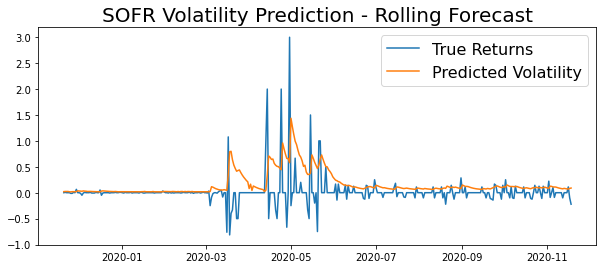

In [162]:

plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('SOFR Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [208]:
from scipy.stats import kurtosis, skew

In [209]:
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(rate) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(rate) ))

excess kurtosis of normal distribution (should be 0): 117.18983605871894
skewness of normal distribution (should be 0): 8.605901675462468


In [220]:
skewt_gm = arch_model(rate, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
skewt_gm = skewt_gm.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: -1559.7547918018772
Iteration:      2,   Func. Count:     26,   Neg. LLF: 2962.928786694122
Iteration:      3,   Func. Count:     37,   Neg. LLF: 2792.6500400497794
Iteration:      4,   Func. Count:     46,   Neg. LLF: 2528.802599835435
Iteration:      5,   Func. Count:     54,   Neg. LLF: 2359.5787256085596
Iteration:      6,   Func. Count:     63,   Neg. LLF: 1864.6266431974545
Iteration:      7,   Func. Count:     72,   Neg. LLF: 1723.494926786807
Iteration:      8,   Func. Count:     81,   Neg. LLF: 1618.6687818922198
Iteration:      9,   Func. Count:     90,   Neg. LLF: 943.6224935394666
Iteration:     10,   Func. Count:    105,   Neg. LLF: 773.3790212423744
Iteration:     11,   Func. Count:    114,   Neg. LLF: 430.13352502364006
Iteration:     12,   Func. Count:    126,   Neg. LLF: 142.76284423517242
Iteration:     13,   Func. Count:    135,   Neg. LLF: 67.0894269620342
Iteration:     14,   Func. Count:    144,   Neg. LLF: -3.

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03286. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [221]:
skewt_gm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                    RATE
(PERCENT)   R-squared:                      -0.034
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.034
Vol Model:                                 GARCH   Log-Likelihood:                441.881
Distribution:      Standardized Skew Student's t   AIC:                          -871.762
Method:                       Maximum Likelihood   BIC:                          -842.554
                                                   No. Observations:                  961
Date:                           Sun, Dec 06 2020   Df Residuals:                      955
Time:                                   06:11:56   Df Model:                            6
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0415  3.017e-02      1.375      0.169 [-1.764e-02,  0.101]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0344  2.452e-03     14.047  8.061e-45 [2.964e-02,3.925e-02]
alpha[1]       0.3229      0.235      1.373      0.170     [ -0.138,  0.784]
beta[1]        0.1845      0.106      1.741  8.162e-02  [-2.316e-02,  0.392]
                                Distribution                                
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
nu           130.5636      9.863     13.237  5.337e-40 [1.112e+02,1.499e+02]
lambda         0.1646      0.128      1.283      0.199  [-8.682e-02,  0.416]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [218]:

pred =skewt_gm.forecast(horizon=10)


In [219]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p = 1, q = 1, vol = 'GARCH', dist = 'skewt',rescale=False)
    model_fit = model.fit()
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    




Iteration:      1,   Func. Count:      7,   Neg. LLF: -1526.1330221819023
Iteration:      2,   Func. Count:     24,   Neg. LLF: 1477.9522880006039
Iteration:      3,   Func. Count:     32,   Neg. LLF: 54.24158891039211
Iteration:      4,   Func. Count:     49,   Neg. LLF: 1005.4097756670154
Iteration:      5,   Func. Count:     57,   Neg. LLF: 895.0411339860455
Iteration:      6,   Func. Count:     67,   Neg. LLF: 72.36858006367585
Iteration:      7,   Func. Count:     75,   Neg. LLF: -347.11286493168564
Iteration:      8,   Func. Count:     83,   Neg. LLF: -819.7491467644248
Iteration:      9,   Func. Count:    100,   Neg. LLF: 1395.683415113793
Iteration:     10,   Func. Count:    107,   Neg. LLF: 1283.0389539008534
Iteration:     11,   Func. Count:    117,   Neg. LLF: -1101.2788574578603
Iteration:     12,   Func. Count:    131,   Neg. LLF: -1119.097619993252
Iteration:     13,   Func. Count:    148,   Neg. LLF: 2713.7638553034676
Iteration:     14,   Func. Count:    156,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:     17,   Func. Count:    172,   Neg. LLF: -1500.3314911558346
Iteration:     18,   Func. Count:    189,   Neg. LLF: 1249.3361885715335
Iteration:     19,   Func. Count:    199,   Neg. LLF: 1249.2295448584084
Iteration:     20,   Func. Count:    207,   Neg. LLF: 989.3900028618135
Iteration:     21,   Func. Count:    214,   Neg. LLF: 532.7511110833261
Iteration:     22,   Func. Count:    222,   Neg. LLF: -578.49173109186
Iteration:     23,   Func. Count:    236,   Neg. LLF: -798.9446722626603
Iteration:     24,   Func. Count:    244,   Neg. LLF: -862.6748531798863
Iteration:     25,   Func. Count:    252,   Neg. LLF: -1031.4917563902334
Iteration:     26,   Func. Count:    260,   Neg. LLF: -1142.2097152881347
Iteration:     27,   Func. Count:    268,   Neg. LLF: -1176.5609886376876
Iteration:     28,   Func. Count:    276,   Neg. LLF: -1211.3279312226036
Iteration:     29,   Func. Count:    283,   Neg. LLF: -1386.3855794617477
Positive directional derivative for linesearch   

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:     10,   Func. Count:    110,   Neg. LLF: 10431.789447004976
Iteration:     11,   Func. Count:    120,   Neg. LLF: 5048.308421689779
Iteration:     12,   Func. Count:    127,   Neg. LLF: 3730.8201998377917
Iteration:     13,   Func. Count:    141,   Neg. LLF: 3688.697102541081
Iteration:     14,   Func. Count:    151,   Neg. LLF: 2129.8323102410836
Iteration:     15,   Func. Count:    167,   Neg. LLF: 1246.4454869305036
Iteration:     16,   Func. Count:    175,   Neg. LLF: 366.06720407512717
Iteration:     17,   Func. Count:    183,   Neg. LLF: -381.8657235560987
Iteration:     18,   Func. Count:    192,   Neg. LLF: -414.5287421646224
Iteration:     19,   Func. Count:    200,   Neg. LLF: -669.8035646587301
Iteration:     20,   Func. Count:    208,   Neg. LLF: -924.8917156983664
Iteration:     21,   Func. Count:    218,   Neg. LLF: -924.9159690135348
Iteration:     22,   Func. Count:    226,   Neg. LLF: -1034.5074464634909
Iteration:     23,   Func. Count:    243,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      1,   Func. Count:      7,   Neg. LLF: -1562.6622077308868
Iteration:      2,   Func. Count:     24,   Neg. LLF: 1575.3460945029374
Iteration:      3,   Func. Count:     34,   Neg. LLF: 1499.2424145811788
Iteration:      4,   Func. Count:     41,   Neg. LLF: 552.9521605297541
Iteration:      5,   Func. Count:     50,   Neg. LLF: -934.1121963245382
Iteration:      6,   Func. Count:     59,   Neg. LLF: -952.5839608905554
Iteration:      7,   Func. Count:     66,   Neg. LLF: -1317.049637840939
Iteration:      8,   Func. Count:     78,   Neg. LLF: -1390.8461790882502
Iteration:      9,   Func. Count:     86,   Neg. LLF: -1552.6223218932562
Iteration:     10,   Func. Count:     93,   Neg. LLF: -1652.8163009857665
Iteration:     11,   Func. Count:    104,   Neg. LLF: -1756.1593546077725
Iteration:     12,   Func. Count:    115,   Neg. LLF: -1774.5295463351267
Iteration:     13,   Func. Count:    126,   Neg. LLF: -1774.929031665536
Iteration:     14,   Func. Count:    134,   Ne

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean


Iteration:     31,   Func. Count:    300,   Neg. LLF: -1190.8007388027163
Iteration:     32,   Func. Count:    313,   Neg. LLF: -1487.5758896137108
Iteration:     33,   Func. Count:    322,   Neg. LLF: -1498.7174083517284
Iteration:     34,   Func. Count:    329,   Neg. LLF: -1612.0808421166203
Iteration:     35,   Func. Count:    337,   Neg. LLF: -1620.0925196185754
Iteration:     36,   Func. Count:    346,   Neg. LLF: -1621.3697980600507
Iteration:     37,   Func. Count:    363,   Neg. LLF: 133.42496380130345
Iteration:     38,   Func. Count:    370,   Neg. LLF: -218.73968432562157
Iteration:     39,   Func. Count:    387,   Neg. LLF: -133.4027576254002
Iteration:     40,   Func. Count:    401,   Neg. LLF: -310.79599523802244
Iteration:     41,   Func. Count:    418,   Neg. LLF: 2368.234040755162
Iteration:     42,   Func. Count:    430,   Neg. LLF: 2139.204306719351
Iteration:     43,   Func. Count:    438,   Neg. LLF: 2127.4961312745563
Iteration:     44,   Func. Count:    446,   

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean


Iteration:      8,   Func. Count:     77,   Neg. LLF: -618.8422858653315
Iteration:      9,   Func. Count:     85,   Neg. LLF: -657.743618120852
Iteration:     10,   Func. Count:     95,   Neg. LLF: -657.7892240662322
Iteration:     11,   Func. Count:    107,   Neg. LLF: -657.8000839380641
Iteration:     12,   Func. Count:    114,   Neg. LLF: -1114.7306481832914
Iteration:     13,   Func. Count:    121,   Neg. LLF: -1494.6606351903815
Iteration:     14,   Func. Count:    135,   Neg. LLF: -1526.5220280213834
Iteration:     15,   Func. Count:    143,   Neg. LLF: -1531.650742235914
Iteration:     16,   Func. Count:    151,   Neg. LLF: -1543.1706347188406
Iteration:     17,   Func. Count:    159,   Neg. LLF: -1554.597675797184
Iteration:     18,   Func. Count:    176,   Neg. LLF: 633.364828740049
Iteration:     19,   Func. Count:    183,   Neg. LLF: 460.03093402972837
Iteration:     20,   Func. Count:    194,   Neg. LLF: -942.744827244786
Iteration:     21,   Func. Count:    204,   Neg. L

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  Con

Iteration:      1,   Func. Count:      7,   Neg. LLF: -1604.3859406702081
Iteration:      2,   Func. Count:     24,   Neg. LLF: 1590.227934760785
Iteration:      3,   Func. Count:     36,   Neg. LLF: 698.2929774863684
Iteration:      4,   Func. Count:     45,   Neg. LLF: -251.78093374082712
Iteration:      5,   Func. Count:     54,   Neg. LLF: -574.7247478879365
Iteration:      6,   Func. Count:     62,   Neg. LLF: -686.3728591739564
Iteration:      7,   Func. Count:     70,   Neg. LLF: -740.8239765845699
Iteration:      8,   Func. Count:     87,   Neg. LLF: 1397.615040542119
Iteration:      9,   Func. Count:     94,   Neg. LLF: 1336.6587163824697
Iteration:     10,   Func. Count:    104,   Neg. LLF: -482.1984000442976
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -482.1984004180347
            Iterations: 13
            Function evaluations: 104
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1607.3

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      9,   Func. Count:     94,   Neg. LLF: 1340.8710525290319
Iteration:     10,   Func. Count:    104,   Neg. LLF: -816.73670753903
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -816.7367078337156
            Iterations: 13
            Function evaluations: 104
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1616.524582974716
Iteration:      2,   Func. Count:     24,   Neg. LLF: 1605.3882537136162
Iteration:      3,   Func. Count:     36,   Neg. LLF: 676.4513266434767
Iteration:      4,   Func. Count:     45,   Neg. LLF: -205.83255833621385
Iteration:      5,   Func. Count:     54,   Neg. LLF: -574.057009532956
Iteration:      6,   Func. Count:     62,   Neg. LLF: -672.7642875951221
Iteration:      7,   Func. Count:     70,   Neg. LLF: -727.5557290547972
Iteration:      8,   Func. Count:     78,   Neg. LLF: -797.3552523321168
Iteration:      9,   Func. Count:     95,   Neg. LLF: 1095.9631

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      9,   Func. Count:     93,   Neg. LLF: -1227.8402436135775
Iteration:     10,   Func. Count:    104,   Neg. LLF: -1231.014149217229
Iteration:     11,   Func. Count:    114,   Neg. LLF: -1246.4162704278338
Iteration:     12,   Func. Count:    129,   Neg. LLF: -1246.6061478154375
Iteration:     13,   Func. Count:    143,   Neg. LLF: -1246.6692324192675
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1246.6692324526891
            Iterations: 17
            Function evaluations: 143
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1629.5602517682637
Iteration:      2,   Func. Count:     24,   Neg. LLF: 1623.743501978576
Iteration:      3,   Func. Count:     34,   Neg. LLF: 1558.653008154386
Iteration:      4,   Func. Count:     46,   Neg. LLF: 518.51451871581
Iteration:      5,   Func. Count:     55,   Neg. LLF: -748.1501677559035
Iteration:      6,   Func. Count:     63,   Neg.

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:     36,   Func. Count:    341,   Neg. LLF: -313.71817127805446
Iteration:     37,   Func. Count:    349,   Neg. LLF: -762.0671195501875
Iteration:     38,   Func. Count:    356,   Neg. LLF: -1093.0874030861146
Iteration:     39,   Func. Count:    373,   Neg. LLF: 2977.1027119839137
Iteration:     40,   Func. Count:    390,   Neg. LLF: 259044.50674385563
Iteration:     41,   Func. Count:    397,   Neg. LLF: 26262.442144350134
Iteration:     42,   Func. Count:    409,   Neg. LLF: 26189.75115175642
Iteration:     43,   Func. Count:    416,   Neg. LLF: 26188.368060009
Iteration:     44,   Func. Count:    423,   Neg. LLF: 26188.060737579555
Iteration:     45,   Func. Count:    430,   Neg. LLF: 26188.058805559638
Iteration:     46,   Func. Count:    437,   Neg. LLF: 26188.058802249376
Iteration:     47,   Func. Count:    444,   Neg. LLF: 26188.058800793377
Iteration:     48,   Func. Count:    451,   Neg. LLF: 26188.058790778265
Iteration:     49,   Func. Count:    458,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      4,   Func. Count:     47,   Neg. LLF: 305.2719409444902
Iteration:      5,   Func. Count:     56,   Neg. LLF: -259.93819179023194
Iteration:      6,   Func. Count:     64,   Neg. LLF: -536.9609468682859
Iteration:      7,   Func. Count:     71,   Neg. LLF: -1229.960351565022
Iteration:      8,   Func. Count:     83,   Neg. LLF: -1458.515944749739
Iteration:      9,   Func. Count:    100,   Neg. LLF: 13329.074760497173
Iteration:     10,   Func. Count:    109,   Neg. LLF: 11599.864029575256
Iteration:     11,   Func. Count:    125,   Neg. LLF: -1480.8579933507467
Iteration:     12,   Func. Count:    142,   Neg. LLF: 12863.36096499335
Iteration:     13,   Func. Count:    154,   Neg. LLF: 11187.635942119115
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 11187.635939150412
            Iterations: 17
            Function evaluations: 154
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:     13,   Func. Count:    143,   Neg. LLF: 21373.884658523224
Iteration:     14,   Func. Count:    150,   Neg. LLF: 21373.788558198576
Iteration:     15,   Func. Count:    157,   Neg. LLF: 21373.76498463133
Iteration:     16,   Func. Count:    164,   Neg. LLF: 21373.733454757967
Iteration:     17,   Func. Count:    171,   Neg. LLF: 21373.733213055162
Iteration:     18,   Func. Count:    178,   Neg. LLF: 21373.731752688025
Iteration:     19,   Func. Count:    185,   Neg. LLF: 21373.724026700595
Iteration:     20,   Func. Count:    192,   Neg. LLF: 21373.68502267439
Iteration:     21,   Func. Count:    199,   Neg. LLF: 21373.482122667916
Iteration:     22,   Func. Count:    206,   Neg. LLF: 21372.4919388523
Iteration:     23,   Func. Count:    213,   Neg. LLF: 21367.523324944617
Iteration:     24,   Func. Count:    220,   Neg. LLF: 21342.46889319304
Iteration:     25,   Func. Count:    227,   Neg. LLF: 21207.815886977776
Iteration:     26,   Func. Count:    234,   Neg. LLF: 20

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Con


Iteration:     10,   Func. Count:    102,   Neg. LLF: -740.3794037769785
Iteration:     11,   Func. Count:    110,   Neg. LLF: -782.1631463572757
Iteration:     12,   Func. Count:    119,   Neg. LLF: -785.9754375924194
Iteration:     13,   Func. Count:    128,   Neg. LLF: -786.6887705375257
Iteration:     14,   Func. Count:    136,   Neg. LLF: -835.19648898846
Iteration:     15,   Func. Count:    150,   Neg. LLF: -835.4963129762787
Iteration:     16,   Func. Count:    157,   Neg. LLF: -860.6454867255918
Iteration:     17,   Func. Count:    164,   Neg. LLF: -1450.9332472093124
Iteration:     18,   Func. Count:    177,   Neg. LLF: -1451.5260021432562
Iteration:     19,   Func. Count:    190,   Neg. LLF: -1451.5320300911171
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1451.5320301790257
            Iterations: 23
            Function evaluations: 190
            Gradient evaluations: 19
Iteration:      1,   Func. Count:      7,   Ne

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      5,   Func. Count:     56,   Neg. LLF: -843.8554709400772
Iteration:      6,   Func. Count:     63,   Neg. LLF: -1579.8244814862346
Iteration:      7,   Func. Count:     80,   Neg. LLF: 9557.062527069153
Iteration:      8,   Func. Count:     88,   Neg. LLF: 2845.7690056555793
Iteration:      9,   Func. Count:     96,   Neg. LLF: 2739.4784033420756
Iteration:     10,   Func. Count:    104,   Neg. LLF: 2406.2559120343576
Iteration:     11,   Func. Count:    111,   Neg. LLF: 2040.5062880319485
Iteration:     12,   Func. Count:    118,   Neg. LLF: 1699.147657064963
Iteration:     13,   Func. Count:    125,   Neg. LLF: 1358.3638827572845
Iteration:     14,   Func. Count:    132,   Neg. LLF: 1030.0594069622941
Iteration:     15,   Func. Count:    140,   Neg. LLF: 856.3000083686187
Iteration:     16,   Func. Count:    148,   Neg. LLF: 654.8151020219518
Iteration:     17,   Func. Count:    164,   Neg. LLF: 125.84156673370353
Iteration:     18,   Func. Count:    172,   Neg. LLF: 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Con


Iteration:      9,   Func. Count:     96,   Neg. LLF: 1929.4058725399805
Iteration:     10,   Func. Count:    104,   Neg. LLF: 1514.5031106998056
Iteration:     11,   Func. Count:    113,   Neg. LLF: 1266.550235004223
Iteration:     12,   Func. Count:    121,   Neg. LLF: 541.4709092186218
Iteration:     13,   Func. Count:    133,   Neg. LLF: -434.36091932323376
Iteration:     14,   Func. Count:    142,   Neg. LLF: -464.7969122751119
Iteration:     15,   Func. Count:    150,   Neg. LLF: -538.1199448249581
Iteration:     16,   Func. Count:    167,   Neg. LLF: -169.15251530307376
Iteration:     17,   Func. Count:    174,   Neg. LLF: -719.6710209807128
Iteration:     18,   Func. Count:    188,   Neg. LLF: -732.2046335811401
Iteration:     19,   Func. Count:    205,   Neg. LLF: 31605.52562779041
Iteration:     20,   Func. Count:    221,   Neg. LLF: 30998.19889933186
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 30998.19889485492
       

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWar


Iteration:     19,   Func. Count:    208,   Neg. LLF: -1574.5005212132305
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1574.5005213428292
            Iterations: 23
            Function evaluations: 208
            Gradient evaluations: 19
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1743.2797792884114
Iteration:      2,   Func. Count:     24,   Neg. LLF: 1777.7314848871329
Iteration:      3,   Func. Count:     36,   Neg. LLF: 11.285116067416745
Iteration:      4,   Func. Count:     46,   Neg. LLF: -682.3286020615615
Iteration:      5,   Func. Count:     54,   Neg. LLF: -1182.6743226734393
Iteration:      6,   Func. Count:     66,   Neg. LLF: -1185.3656168850907
Iteration:      7,   Func. Count:     82,   Neg. LLF: -1185.7190080217047
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1185.7190080606993
            Iterations: 11
            Function evaluations: 82
    

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     20,   Func. Count:    207,   Neg. LLF: -565.6062695157199
Iteration:     21,   Func. Count:    214,   Neg. LLF: -1550.6569327707218
Iteration:     22,   Func. Count:    228,   Neg. LLF: -1571.6746194626357
Iteration:     23,   Func. Count:    242,   Neg. LLF: -1612.8361688039565
Iteration:     24,   Func. Count:    252,   Neg. LLF: -1613.2697560801378
Iteration:     25,   Func. Count:    260,   Neg. LLF: -1614.795365208142
Iteration:     26,   Func. Count:    268,   Neg. LLF: -1616.4612899050212
Iteration:     27,   Func. Count:    276,   Neg. LLF: -1616.6228289094606
Iteration:     28,   Func. Count:    283,   Neg. LLF: -1616.7072675001716
Iteration:     29,   Func. Count:    290,   Neg. LLF: -1616.7692044193022
Iteration:     30,   Func. Count:    297,   Neg. LLF: -1617.0155171433667
Iteration:     31,   Func. Count:    304,   Neg. LLF: -1617.4449521498677
Iteration:     32,   Func. Count:    311,   Neg. LLF: -1618.700179809167
Iteration:     33,   Func. Count:    318,

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:     32,   Func. Count:    285,   Neg. LLF: -2044.8489310055916
Iteration:     33,   Func. Count:    292,   Neg. LLF: -2051.235835967612
Iteration:     34,   Func. Count:    299,   Neg. LLF: -2054.3564525645806
Iteration:     35,   Func. Count:    306,   Neg. LLF: -2057.6187286048826
Iteration:     36,   Func. Count:    313,   Neg. LLF: -2059.2406160082273
Iteration:     37,   Func. Count:    320,   Neg. LLF: -2060.2675123094914
Iteration:     38,   Func. Count:    327,   Neg. LLF: -2061.118443899064
Iteration:     39,   Func. Count:    334,   Neg. LLF: -2061.5753080166387
Iteration:     40,   Func. Count:    341,   Neg. LLF: -2061.6871635018547
Iteration:     41,   Func. Count:    348,   Neg. LLF: -2061.702494259644
Iteration:     42,   Func. Count:    355,   Neg. LLF: -2061.7047101502485
Iteration:     43,   Func. Count:    362,   Neg. LLF: -2061.7070822701494
Iteration:     44,   Func. Count:    369,   Neg. LLF: -2061.708839829082
Iteration:     45,   Func. Count:    376, 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      2,   Func. Count:     24,   Neg. LLF: 1858.5936344777651
Iteration:      3,   Func. Count:     35,   Neg. LLF: 1820.0093221960901
Iteration:      4,   Func. Count:     47,   Neg. LLF: -893.7003226173399
Iteration:      5,   Func. Count:     59,   Neg. LLF: -1161.582579832973
Iteration:      6,   Func. Count:     76,   Neg. LLF: -1041.7124983147041
Iteration:      7,   Func. Count:     86,   Neg. LLF: -1138.4847504745776
Iteration:      8,   Func. Count:    103,   Neg. LLF: 2131.3560626910476
Iteration:      9,   Func. Count:    110,   Neg. LLF: 2083.577577989831
Iteration:     10,   Func. Count:    121,   Neg. LLF: 2074.496782864069
Iteration:     11,   Func. Count:    128,   Neg. LLF: 2049.2076015580806
Iteration:     12,   Func. Count:    135,   Neg. LLF: 1905.1833010114003
Iteration:     13,   Func. Count:    143,   Neg. LLF: 1784.8602142911177
Iteration:     14,   Func. Count:    152,   Neg. LLF: -594.4148156799675
Iteration:     15,   Func. Count:    169,   Neg. LL

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      1,   Func. Count:      7,   Neg. LLF: -1809.0051279308225
Iteration:      2,   Func. Count:     24,   Neg. LLF: 1873.2785665389504
Iteration:      3,   Func. Count:     36,   Neg. LLF: -229.50838894705197
Iteration:      4,   Func. Count:     46,   Neg. LLF: -414.94187262511423
Iteration:      5,   Func. Count:     54,   Neg. LLF: -638.5827514966583
Iteration:      6,   Func. Count:     62,   Neg. LLF: -695.5435912723975
Iteration:      7,   Func. Count:     70,   Neg. LLF: -786.4282942967138
Iteration:      8,   Func. Count:     87,   Neg. LLF: -791.5809829586422
Iteration:      9,   Func. Count:     94,   Neg. LLF: -804.5245912864195
Iteration:     10,   Func. Count:    101,   Neg. LLF: -1981.0465145507994
Iteration:     11,   Func. Count:    117,   Neg. LLF: -1998.971744051602
Iteration:     12,   Func. Count:    134,   Neg. LLF: 2407.624145452828
Iteration:     13,   Func. Count:    151,   Neg. LLF: 2185.594234253853
Iteration:     14,   Func. Count:    158,   Neg. 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:     17,   Func. Count:    162,   Neg. LLF: 1540.314117042268
Iteration:     18,   Func. Count:    170,   Neg. LLF: 1293.8336673775361
Iteration:     19,   Func. Count:    177,   Neg. LLF: 690.8424521607943
Iteration:     20,   Func. Count:    185,   Neg. LLF: -1463.6046305540015
Iteration:     21,   Func. Count:    195,   Neg. LLF: -1515.3822446417635
Iteration:     22,   Func. Count:    202,   Neg. LLF: -1633.6905568688553
Iteration:     23,   Func. Count:    213,   Neg. LLF: -2017.5536911158424
Iteration:     24,   Func. Count:    222,   Neg. LLF: -2073.598872915434
Iteration:     25,   Func. Count:    239,   Neg. LLF: 2925.2494308234654
Iteration:     26,   Func. Count:    252,   Neg. LLF: 2634.7899584283887
Iteration:     27,   Func. Count:    261,   Neg. LLF: 2628.324894402298
Iteration:     28,   Func. Count:    269,   Neg. LLF: 2227.93903372182
Iteration:     29,   Func. Count:    276,   Neg. LLF: 2071.678892505847
Iteration:     30,   Func. Count:    283,   Neg. LLF:

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:      6,   Func. Count:     61,   Neg. LLF: -88.59824854093193
Iteration:      7,   Func. Count:     69,   Neg. LLF: -333.250287917413
Iteration:      8,   Func. Count:     79,   Neg. LLF: -410.9575433386722
Iteration:      9,   Func. Count:     87,   Neg. LLF: -581.7901077164944
Iteration:     10,   Func. Count:     98,   Neg. LLF: -692.578499124785
Iteration:     11,   Func. Count:    106,   Neg. LLF: -729.312162176328
Iteration:     12,   Func. Count:    121,   Neg. LLF: -729.5982604455334
Iteration:     13,   Func. Count:    132,   Neg. LLF: -729.6321688007066
Iteration:     14,   Func. Count:    144,   Neg. LLF: -729.6581304317756
Iteration:     15,   Func. Count:    155,   Neg. LLF: -729.6971706852096
Iteration:     16,   Func. Count:    162,   Neg. LLF: -1587.4243399298343
Iteration:     17,   Func. Count:    174,   Neg. LLF: -1646.810487872624
Iteration:     18,   Func. Count:    191,   Neg. LLF: -1646.9896896020846
Positive directional derivative for linesearch    (

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:      6,   Func. Count:     60,   Neg. LLF: -635.7243237513117
Iteration:      7,   Func. Count:     67,   Neg. LLF: -1385.784628554507
Iteration:      8,   Func. Count:     78,   Neg. LLF: -1485.8615917286452
Iteration:      9,   Func. Count:     94,   Neg. LLF: -1486.2468119204916
Iteration:     10,   Func. Count:    108,   Neg. LLF: -1486.2668027188806
Iteration:     11,   Func. Count:    117,   Neg. LLF: -1500.0069311737973
Iteration:     12,   Func. Count:    134,   Neg. LLF: 3927.2951039994714
Iteration:     13,   Func. Count:    142,   Neg. LLF: 2415.2766611304564
Iteration:     14,   Func. Count:    150,   Neg. LLF: 2385.584331914623
Iteration:     15,   Func. Count:    157,   Neg. LLF: 2278.8495829829135
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 2278.849582989086
            Iterations: 19
            Function evaluations: 157
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      7,   Ne

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Con

Iteration:      9,   Func. Count:     89,   Neg. LLF: 2537.7012820343225
Iteration:     10,   Func. Count:     97,   Neg. LLF: -101.26035180173767
Iteration:     11,   Func. Count:    114,   Neg. LLF: 2002.8018073709536
Iteration:     12,   Func. Count:    121,   Neg. LLF: 1832.6295414543683
Iteration:     13,   Func. Count:    129,   Neg. LLF: 1820.016444992389
Iteration:     14,   Func. Count:    137,   Neg. LLF: 1703.6432019242036
Iteration:     15,   Func. Count:    145,   Neg. LLF: 956.7235271654628
Iteration:     16,   Func. Count:    155,   Neg. LLF: 267.77748693181707
Iteration:     17,   Func. Count:    163,   Neg. LLF: -526.4553709627663
Iteration:     18,   Func. Count:    171,   Neg. LLF: -570.7594342168263
Iteration:     19,   Func. Count:    188,   Neg. LLF: -588.6050183670476
Iteration:     20,   Func. Count:    195,   Neg. LLF: -1345.847542612667
Iteration:     21,   Func. Count:    208,   Neg. LLF: -1444.946535191416
Iteration:     22,   Func. Count:    225,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:      9,   Func. Count:     89,   Neg. LLF: 2802.3234086832745
Iteration:     10,   Func. Count:     97,   Neg. LLF: 73.51794820839008
Iteration:     11,   Func. Count:    114,   Neg. LLF: 2220.7734938513154
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2126.390137536615
Iteration:     13,   Func. Count:    128,   Neg. LLF: 2057.4926609202134
Iteration:     14,   Func. Count:    135,   Neg. LLF: 1966.8388563622839
Iteration:     15,   Func. Count:    152,   Neg. LLF: 4916.741604796516
Iteration:     16,   Func. Count:    161,   Neg. LLF: 4526.36439479555
Iteration:     17,   Func. Count:    169,   Neg. LLF: 4465.069942529215
Iteration:     18,   Func. Count:    177,   Neg. LLF: 1418.5102475398353
Iteration:     19,   Func. Count:    187,   Neg. LLF: 148.30525708981708
Iteration:     20,   Func. Count:    196,   Neg. LLF: -618.8191214850475
Iteration:     21,   Func. Count:    204,   Neg. LLF: -686.125578976092
Iteration:     22,   Func. Count:    212,   Neg. LLF: -75

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean


Iteration:     37,   Func. Count:    353,   Neg. LLF: -403.95909925247645
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -403.9590992992732
            Iterations: 41
            Function evaluations: 353
            Gradient evaluations: 37
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1785.4031546213096
Iteration:      2,   Func. Count:     24,   Neg. LLF: 1360.2236507336902
Iteration:      3,   Func. Count:     38,   Neg. LLF: 217.97337964795454
Iteration:      4,   Func. Count:     47,   Neg. LLF: -529.7818326803304
Iteration:      5,   Func. Count:     54,   Neg. LLF: -691.6051437388214
Iteration:      6,   Func. Count:     67,   Neg. LLF: -694.7785053714687
Iteration:      7,   Func. Count:     79,   Neg. LLF: -1254.9079350177358
Iteration:      8,   Func. Count:     87,   Neg. LLF: -1639.377367412984
Iteration:      9,   Func. Count:     95,   Neg. LLF: -1676.4376205204258
Iteration:     10,   Func. Count:    103,   

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     16,   Func. Count:    190,   Neg. LLF: -1671.923214814829
Iteration:     17,   Func. Count:    202,   Neg. LLF: -1703.741366823338
Iteration:     18,   Func. Count:    217,   Neg. LLF: -1703.75077067263
Iteration:     19,   Func. Count:    224,   Neg. LLF: -2104.1164441316046
Iteration:     20,   Func. Count:    235,   Neg. LLF: -2121.020172414288
Iteration:     21,   Func. Count:    243,   Neg. LLF: -2121.6180710418826
Iteration:     22,   Func. Count:    250,   Neg. LLF: -2124.596772985399
Iteration:     23,   Func. Count:    258,   Neg. LLF: -2125.8505920795615
Iteration:     24,   Func. Count:    266,   Neg. LLF: -2126.983823288563
Iteration:     25,   Func. Count:    274,   Neg. LLF: -2127.9422217530696
Iteration:     26,   Func. Count:    282,   Neg. LLF: -2128.4884558065346
Iteration:     27,   Func. Count:    291,   Neg. LLF: -2128.5405781608565
Iteration:     28,   Func. Count:    298,   Neg. LLF: -2128.68793220331
Iteration:     29,   Func. Count:    305,   Neg

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:     12,   Func. Count:    120,   Neg. LLF: -1625.7926196401704
Iteration:     13,   Func. Count:    128,   Neg. LLF: -1656.8342960427613
Iteration:     14,   Func. Count:    138,   Neg. LLF: -1658.5999919326125
Iteration:     15,   Func. Count:    146,   Neg. LLF: -1679.8828236842821
Iteration:     16,   Func. Count:    163,   Neg. LLF: 4387.523454487318
Iteration:     17,   Func. Count:    171,   Neg. LLF: 3012.368381329461
Iteration:     18,   Func. Count:    182,   Neg. LLF: 3000.4568013914677
Iteration:     19,   Func. Count:    189,   Neg. LLF: 2950.4076907760627
Iteration:     20,   Func. Count:    197,   Neg. LLF: 2913.3106435655573
Iteration:     21,   Func. Count:    205,   Neg. LLF: 2909.227235866041
Iteration:     22,   Func. Count:    212,   Neg. LLF: 2835.6625027036243
Iteration:     23,   Func. Count:    219,   Neg. LLF: 2218.86035810438
Iteration:     24,   Func. Count:    227,   Neg. LLF: 198.6251770037952
Iteration:     25,   Func. Count:    237,   Neg. LLF:

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     23,   Func. Count:    240,   Neg. LLF: 381.3791923731109
Iteration:     24,   Func. Count:    257,   Neg. LLF: 405.2185107805253
Iteration:     25,   Func. Count:    265,   Neg. LLF: 125.15082679368481
Iteration:     26,   Func. Count:    276,   Neg. LLF: -457.337290949754
Iteration:     27,   Func. Count:    284,   Neg. LLF: -575.1040757052367
Iteration:     28,   Func. Count:    292,   Neg. LLF: -624.8328394434761
Iteration:     29,   Func. Count:    300,   Neg. LLF: -685.6514331944167
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -685.6514332559233
            Iterations: 33
            Function evaluations: 300
            Gradient evaluations: 29
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1733.9807657393321
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2186.1528053925467
Iteration:      3,   Func. Count:     35,   Neg. LLF: 2123.9719638393476
Iteration:      4,   Func. Count:     46,   Neg. LL

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:     22,   Func. Count:    222,   Neg. LLF: -370.36054336981056
Iteration:     23,   Func. Count:    230,   Neg. LLF: -526.14697051799
Iteration:     24,   Func. Count:    238,   Neg. LLF: -589.4040127034516
Iteration:     25,   Func. Count:    246,   Neg. LLF: -750.043951732783
Iteration:     26,   Func. Count:    254,   Neg. LLF: -893.5387712492015
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -893.5387712656322
            Iterations: 30
            Function evaluations: 254
            Gradient evaluations: 26
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1737.0798211661302
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2191.7741756873575
Iteration:      3,   Func. Count:     35,   Neg. LLF: 2125.172267164552
Iteration:      4,   Func. Count:     42,   Neg. LLF: 670.669380552639
Iteration:      5,   Func. Count:     50,   Neg. LLF: -157.90783080987887
Iteration:      6,   Func. Count:     59,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      8,   Func. Count:     80,   Neg. LLF: -52.75424536060336
Iteration:      9,   Func. Count:     88,   Neg. LLF: -133.93352167760105
Iteration:     10,   Func. Count:     96,   Neg. LLF: -300.51873615463876
Iteration:     11,   Func. Count:    104,   Neg. LLF: -349.1056604735345
Iteration:     12,   Func. Count:    112,   Neg. LLF: -382.9945984075532
Iteration:     13,   Func. Count:    128,   Neg. LLF: -405.12961792635656
Iteration:     14,   Func. Count:    136,   Neg. LLF: -457.98637903670465
Iteration:     15,   Func. Count:    149,   Neg. LLF: -460.4449017715996
Iteration:     16,   Func. Count:    157,   Neg. LLF: -510.6972452770111
Iteration:     17,   Func. Count:    169,   Neg. LLF: -510.7807706454994
Iteration:     18,   Func. Count:    176,   Neg. LLF: -1590.249869201728
Iteration:     19,   Func. Count:    187,   Neg. LLF: -1591.4309231477212
Iteration:     20,   Func. Count:    196,   Neg. LLF: -1603.095480580418
Iteration:     21,   Func. Count:    203,   Ne

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:     21,   Func. Count:    196,   Neg. LLF: 502.391648349865
Iteration:     22,   Func. Count:    203,   Neg. LLF: -143.98112176090905
Iteration:     23,   Func. Count:    212,   Neg. LLF: -389.4954421801858
Iteration:     24,   Func. Count:    227,   Neg. LLF: -390.748968926629
Iteration:     25,   Func. Count:    234,   Neg. LLF: -1070.4104082977153
Iteration:     26,   Func. Count:    242,   Neg. LLF: -1967.4118282132927
Iteration:     27,   Func. Count:    251,   Neg. LLF: -1973.9918754300493
Iteration:     28,   Func. Count:    259,   Neg. LLF: -1984.168470868212
Iteration:     29,   Func. Count:    267,   Neg. LLF: -1992.9744929126368
Iteration:     30,   Func. Count:    275,   Neg. LLF: -2000.867781802112
Iteration:     31,   Func. Count:    283,   Neg. LLF: -2007.779979355637
Iteration:     32,   Func. Count:    291,   Neg. LLF: -2012.9438580245087
Iteration:     33,   Func. Count:    299,   Neg. LLF: -2016.811504666246
Iteration:     34,   Func. Count:    307,   Neg.

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      1,   Func. Count:      7,   Neg. LLF: -1479.1976923919697
Iteration:      2,   Func. Count:     24,   Neg. LLF: -1314.5102010269136
Iteration:      3,   Func. Count:     41,   Neg. LLF: 3149.0381735831966
Iteration:      4,   Func. Count:     51,   Neg. LLF: 3019.400333612262
Iteration:      5,   Func. Count:     58,   Neg. LLF: 2986.674369776874
Iteration:      6,   Func. Count:     68,   Neg. LLF: 2978.7042282474104
Iteration:      7,   Func. Count:     77,   Neg. LLF: 2978.1938667467657
Iteration:      8,   Func. Count:     84,   Neg. LLF: 1450.6973080870998
Iteration:      9,   Func. Count:     97,   Neg. LLF: 630.9658771578124
Iteration:     10,   Func. Count:    105,   Neg. LLF: -589.3455484583625
Iteration:     11,   Func. Count:    114,   Neg. LLF: -1011.978719631267
Iteration:     12,   Func. Count:    122,   Neg. LLF: -1097.5426630642496
Iteration:     13,   Func. Count:    129,   Neg. LLF: -1390.4482259618067
Iteration:     14,   Func. Count:    141,   Neg. L

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Con


Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1474.2136776639295
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1474.074643848733
Iteration:      2,   Func. Count:     24,   Neg. LLF: -1474.261312546167
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1474.2613135259205
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1474.3276276287193
Iteration:      2,   Func. Count:     24,   Neg. LLF: -1474.5137117230013
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1474.5137127042713
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      7,   Neg.

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      2,   Func. Count:     24,   Neg. LLF: 1202.0822178314907
Iteration:      3,   Func. Count:     39,   Neg. LLF: 154.2842908020446
Iteration:      4,   Func. Count:     50,   Neg. LLF: 11.201977682656661
Iteration:      5,   Func. Count:     58,   Neg. LLF: -400.34302116340467
Iteration:      6,   Func. Count:     75,   Neg. LLF: 1182.4456187130738
Iteration:      7,   Func. Count:     82,   Neg. LLF: 826.977840981769
Iteration:      8,   Func. Count:     93,   Neg. LLF: 125.40785898877279
Iteration:      9,   Func. Count:    108,   Neg. LLF: -906.3380368357037
Iteration:     10,   Func. Count:    125,   Neg. LLF: 2099.062985739163
Iteration:     11,   Func. Count:    142,   Neg. LLF: 1189.4811899122155
Iteration:     12,   Func. Count:    159,   Neg. LLF: 1318.829326175881
Iteration:     13,   Func. Count:    172,   Neg. LLF: 1286.6284354269103
Iteration:     14,   Func. Count:    180,   Neg. LLF: 593.9572732324727
Iteration:     15,   Func. Count:    197,   Neg. LLF: -8

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  Con

Iteration:      2,   Func. Count:     24,   Neg. LLF: 1807.3323493619396
Iteration:      3,   Func. Count:     35,   Neg. LLF: 1764.7763078846433
Iteration:      4,   Func. Count:     48,   Neg. LLF: -855.8869089124288
Iteration:      5,   Func. Count:     58,   Neg. LLF: -890.7646052630413
Iteration:      6,   Func. Count:     75,   Neg. LLF: 439.41004118139597
Iteration:      7,   Func. Count:     92,   Neg. LLF: 783.4676701067483
Iteration:      8,   Func. Count:     99,   Neg. LLF: 320.74122660252124
Iteration:      9,   Func. Count:    107,   Neg. LLF: 285.35926604298936
Iteration:     10,   Func. Count:    114,   Neg. LLF: 17.719104750454477
Iteration:     11,   Func. Count:    131,   Neg. LLF: -205.63841450514445
Iteration:     12,   Func. Count:    141,   Neg. LLF: -1090.8973666967431
Iteration:     13,   Func. Count:    149,   Neg. LLF: -1161.7065356133787
Iteration:     14,   Func. Count:    156,   Neg. LLF: -1391.188533805967
Iteration:     15,   Func. Count:    164,   Neg. 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     35,   Func. Count:    343,   Neg. LLF: 2794.8413596586824
Iteration:     36,   Func. Count:    350,   Neg. LLF: 2657.083712255724
Iteration:     37,   Func. Count:    357,   Neg. LLF: 1251.1700896703373
Iteration:     38,   Func. Count:    366,   Neg. LLF: 280.5583515641781
Iteration:     39,   Func. Count:    373,   Neg. LLF: -65.04570245330102
Iteration:     40,   Func. Count:    384,   Neg. LLF: -119.88295209547859
Iteration:     41,   Func. Count:    399,   Neg. LLF: -728.6733871398189
Iteration:     42,   Func. Count:    407,   Neg. LLF: -819.0126423426905
Iteration:     43,   Func. Count:    415,   Neg. LLF: -852.0411879500246
Iteration:     44,   Func. Count:    423,   Neg. LLF: -889.09675477418
Iteration:     45,   Func. Count:    431,   Neg. LLF: -928.7188286853543
Iteration:     46,   Func. Count:    438,   Neg. LLF: -1068.1119675779796
Iteration:     47,   Func. Count:    447,   Neg. LLF: -2040.9493871038476
Iteration:     48,   Func. Count:    455,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     50,   Func. Count:    487,   Neg. LLF: -2126.2111070483124
Iteration:     51,   Func. Count:    494,   Neg. LLF: -2126.424000748014
Iteration:     52,   Func. Count:    501,   Neg. LLF: -2126.519540808088
Iteration:     53,   Func. Count:    508,   Neg. LLF: -2126.5653442609237
Iteration:     54,   Func. Count:    515,   Neg. LLF: -2126.5956297369166
Iteration:     55,   Func. Count:    522,   Neg. LLF: -2126.6773324449073
Iteration:     56,   Func. Count:    529,   Neg. LLF: -2126.8514511704516
Iteration:     57,   Func. Count:    536,   Neg. LLF: -2127.651321283067
Iteration:     58,   Func. Count:    543,   Neg. LLF: -2139.30241436117
Iteration:     59,   Func. Count:    550,   Neg. LLF: -2139.4905969285705
Iteration:     60,   Func. Count:    557,   Neg. LLF: -2139.6512382325354
Iteration:     61,   Func. Count:    564,   Neg. LLF: -2139.8110576957465
Iteration:     62,   Func. Count:    571,   Neg. LLF: -2140.2504647598034
Iteration:     63,   Func. Count:    578,  

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     25,   Func. Count:    246,   Neg. LLF: -2116.9625976443767
Iteration:     26,   Func. Count:    254,   Neg. LLF: -2119.0802539032197
Iteration:     27,   Func. Count:    262,   Neg. LLF: -2120.5340444813382
Iteration:     28,   Func. Count:    270,   Neg. LLF: -2121.861045472675
Iteration:     29,   Func. Count:    278,   Neg. LLF: -2124.8228175208924
Iteration:     30,   Func. Count:    286,   Neg. LLF: -2126.270147053094
Iteration:     31,   Func. Count:    294,   Neg. LLF: -2130.4359874641323
Iteration:     32,   Func. Count:    302,   Neg. LLF: -2131.891685263808
Iteration:     33,   Func. Count:    310,   Neg. LLF: -2133.0566776731584
Iteration:     34,   Func. Count:    317,   Neg. LLF: -2135.5024106798232
Iteration:     35,   Func. Count:    331,   Neg. LLF: -2139.626018727985
Iteration:     36,   Func. Count:    347,   Neg. LLF: -2139.626775931828
Iteration:     37,   Func. Count:    354,   Neg. LLF: -2157.7123035954237
Positive directional derivative for linesea

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     25,   Func. Count:    235,   Neg. LLF: -2065.832114640854
Iteration:     26,   Func. Count:    252,   Neg. LLF: -2097.1990090298923
Iteration:     27,   Func. Count:    260,   Neg. LLF: -2119.695193206777
Iteration:     28,   Func. Count:    268,   Neg. LLF: -2123.382823725223
Iteration:     29,   Func. Count:    276,   Neg. LLF: -2125.358993804798
Iteration:     30,   Func. Count:    284,   Neg. LLF: -2128.348284677137
Iteration:     31,   Func. Count:    292,   Neg. LLF: -2131.0641902009893
Iteration:     32,   Func. Count:    300,   Neg. LLF: -2132.652594953641
Iteration:     33,   Func. Count:    308,   Neg. LLF: -2135.0486013059935
Iteration:     34,   Func. Count:    315,   Neg. LLF: -2135.7873651749346
Iteration:     35,   Func. Count:    322,   Neg. LLF: -2136.838346110487
Iteration:     36,   Func. Count:    330,   Neg. LLF: -2137.8567490557903
Iteration:     37,   Func. Count:    337,   Neg. LLF: -2140.895147047503
Iteration:     38,   Func. Count:    344,   Ne

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Con

Iteration:     14,   Func. Count:    144,   Neg. LLF: 3267.988666945175
Iteration:     15,   Func. Count:    151,   Neg. LLF: 2718.8091312034608
Iteration:     16,   Func. Count:    159,   Neg. LLF: 2562.634817342425
Iteration:     17,   Func. Count:    169,   Neg. LLF: -237.19478302688552
Iteration:     18,   Func. Count:    180,   Neg. LLF: -268.46951805116373
Iteration:     19,   Func. Count:    188,   Neg. LLF: -334.98512598319496
Iteration:     20,   Func. Count:    196,   Neg. LLF: -412.81889830284257
Iteration:     21,   Func. Count:    204,   Neg. LLF: -475.55008622668424
Iteration:     22,   Func. Count:    220,   Neg. LLF: -480.0888725372974
Iteration:     23,   Func. Count:    228,   Neg. LLF: -566.8209055088744
Iteration:     24,   Func. Count:    236,   Neg. LLF: -626.5444427167761
Iteration:     25,   Func. Count:    250,   Neg. LLF: -626.9770560328504
Iteration:     26,   Func. Count:    258,   Neg. LLF: -712.8932807253544
Iteration:     27,   Func. Count:    270,   Neg.

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean


Iteration:      3,   Func. Count:     34,   Neg. LLF: 2176.95665556833
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2071.050798238303
Iteration:      5,   Func. Count:     48,   Neg. LLF: -1010.3499027105382
Iteration:      6,   Func. Count:     59,   Neg. LLF: -1731.5204232405158
Iteration:      7,   Func. Count:     70,   Neg. LLF: -1740.4318385228792
Iteration:      8,   Func. Count:     87,   Neg. LLF: 2564.726533365858
Iteration:      9,   Func. Count:    102,   Neg. LLF: 2261.306669052321
Iteration:     10,   Func. Count:    109,   Neg. LLF: 2217.8720277819502
Iteration:     11,   Func. Count:    117,   Neg. LLF: 1303.0834738807575
Iteration:     12,   Func. Count:    125,   Neg. LLF: -299.1093874255501
Iteration:     13,   Func. Count:    142,   Neg. LLF: 17681.380529865506
Iteration:     14,   Func. Count:    149,   Neg. LLF: 14651.846025704333
Iteration:     15,   Func. Count:    159,   Neg. LLF: 14026.348129572205
Iteration:     16,   Func. Count:    166,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     10,   Func. Count:    104,   Neg. LLF: -1804.433409293883
Iteration:     11,   Func. Count:    112,   Neg. LLF: -1895.825514594802
Iteration:     12,   Func. Count:    129,   Neg. LLF: -576.8183484939418
Iteration:     13,   Func. Count:    146,   Neg. LLF: 3458.6666359128585
Iteration:     14,   Func. Count:    158,   Neg. LLF: 3162.6620763689734
Iteration:     15,   Func. Count:    165,   Neg. LLF: 2833.002821041175
Iteration:     16,   Func. Count:    172,   Neg. LLF: 2736.9896987935786
Iteration:     17,   Func. Count:    179,   Neg. LLF: 1825.930265386697
Iteration:     18,   Func. Count:    189,   Neg. LLF: 1119.2536086407758
Iteration:     19,   Func. Count:    197,   Neg. LLF: 590.4120698875865
Iteration:     20,   Func. Count:    206,   Neg. LLF: 519.2410229812012
Iteration:     21,   Func. Count:    213,   Neg. LLF: -336.2636748036839
Iteration:     22,   Func. Count:    230,   Neg. LLF: -598.7572384871947
Iteration:     23,   Func. Count:    244,   Neg. LLF: -

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


            Gradient evaluations: 94
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1328.820561149069
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2343.7558683593516
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2254.992293752258
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2167.91187030504
Iteration:      5,   Func. Count:     49,   Neg. LLF: 1761.9988351752927
Iteration:      6,   Func. Count:     58,   Neg. LLF: 86.29951754999854
Iteration:      7,   Func. Count:     66,   Neg. LLF: -1233.9231267614373
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2979.548867723277
Iteration:      9,   Func. Count:     90,   Neg. LLF: 2970.184615062032
Iteration:     10,   Func. Count:     97,   Neg. LLF: 2956.1504007775575
Iteration:     11,   Func. Count:    104,   Neg. LLF: 2881.004861245384
Iteration:     12,   Func. Count:    112,   Neg. LLF: 2836.5543759852926
Iteration:     13,   Func. Count:    120,   Neg. LLF: 2554.365628110444
Iteration:     14,   

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:      2,   Func. Count:     24,   Neg. LLF: 2351.7722672004893
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2262.757860771696
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2180.477863390788
Iteration:      5,   Func. Count:     48,   Neg. LLF: 973.942160521357
Iteration:      6,   Func. Count:     65,   Neg. LLF: 3442.698165818638
Iteration:      7,   Func. Count:     73,   Neg. LLF: 3412.5304643858763
Iteration:      8,   Func. Count:     83,   Neg. LLF: 1597.7724668971114
Iteration:      9,   Func. Count:     92,   Neg. LLF: -260.35194748736103
Iteration:     10,   Func. Count:    102,   Neg. LLF: -1382.9684817129885
Iteration:     11,   Func. Count:    119,   Neg. LLF: 989.2442819181149
Iteration:     12,   Func. Count:    135,   Neg. LLF: -1108.985367337925
Iteration:     13,   Func. Count:    144,   Neg. LLF: -1332.012498020371
Iteration:     14,   Func. Count:    161,   Neg. LLF: -1313.2121270063105
Iteration:     15,   Func. Count:    178,   Neg. LLF:

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:      2,   Func. Count:     24,   Neg. LLF: 2358.558761731956
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2269.457714103436
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2181.953973072394
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2120.2112665966733
Iteration:      6,   Func. Count:     58,   Neg. LLF: 2120.059085318838
Iteration:      7,   Func. Count:     68,   Neg. LLF: -623.4418987902363
Iteration:      8,   Func. Count:     79,   Neg. LLF: -1213.7780840662201
Iteration:      9,   Func. Count:     88,   Neg. LLF: -1277.713578546805
Iteration:     10,   Func. Count:    105,   Neg. LLF: 2555.1123470642833
Iteration:     11,   Func. Count:    113,   Neg. LLF: 2552.5723265448496
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2504.7330017960057
Iteration:     13,   Func. Count:    128,   Neg. LLF: 1906.934946318746
Iteration:     14,   Func. Count:    139,   Neg. LLF: 1094.0845860804104
Iteration:     15,   Func. Count:    147,   Neg. LLF: 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      6,   Func. Count:     57,   Neg. LLF: 2049.2994208745577
Iteration:      7,   Func. Count:     69,   Neg. LLF: 436.58991614930994
Iteration:      8,   Func. Count:     78,   Neg. LLF: -553.3437227425917
Iteration:      9,   Func. Count:     86,   Neg. LLF: -1076.9924632914958
Iteration:     10,   Func. Count:     94,   Neg. LLF: -1295.7408483040495
Iteration:     11,   Func. Count:    111,   Neg. LLF: -1248.569211557578
Iteration:     12,   Func. Count:    125,   Neg. LLF: -1279.4143444498168
Iteration:     13,   Func. Count:    142,   Neg. LLF: 2040.3974295284934
Iteration:     14,   Func. Count:    149,   Neg. LLF: 1968.8516656476875
Iteration:     15,   Func. Count:    157,   Neg. LLF: 1663.7917471679234
Iteration:     16,   Func. Count:    172,   Neg. LLF: -89.27262488271862
Iteration:     17,   Func. Count:    181,   Neg. LLF: -926.6403058466647
Iteration:     18,   Func. Count:    189,   Neg. LLF: -1139.9971347224607
Iteration:     19,   Func. Count:    200,   Neg

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean


Iteration:     11,   Func. Count:    123,   Neg. LLF: -1051.4863941337471
Iteration:     12,   Func. Count:    131,   Neg. LLF: -1082.3275917516592
Iteration:     13,   Func. Count:    148,   Neg. LLF: -808.5180193325649
Iteration:     14,   Func. Count:    165,   Neg. LLF: 2794.7138410032208
Iteration:     15,   Func. Count:    175,   Neg. LLF: 2787.756126189075
Iteration:     16,   Func. Count:    182,   Neg. LLF: 2246.084319855461
Iteration:     17,   Func. Count:    192,   Neg. LLF: 2156.221800354058
Iteration:     18,   Func. Count:    200,   Neg. LLF: 1263.5398291708902
Iteration:     19,   Func. Count:    211,   Neg. LLF: -108.49130735354181
Iteration:     20,   Func. Count:    219,   Neg. LLF: -146.6128341749
Iteration:     21,   Func. Count:    227,   Neg. LLF: -216.70672093935534
Iteration:     22,   Func. Count:    234,   Neg. LLF: -1447.8310173878208
Iteration:     23,   Func. Count:    251,   Neg. LLF: 3843.685879322599
Iteration:     24,   Func. Count:    260,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      6,   Func. Count:     60,   Neg. LLF: 464.59769541414903
Iteration:      7,   Func. Count:     77,   Neg. LLF: 2681.093549267688
Iteration:      8,   Func. Count:     88,   Neg. LLF: 668.9511204017675
Iteration:      9,   Func. Count:     96,   Neg. LLF: 257.55055089208565
Iteration:     10,   Func. Count:    104,   Neg. LLF: 140.97561214206223
Iteration:     11,   Func. Count:    112,   Neg. LLF: -110.72515716062755
Iteration:     12,   Func. Count:    120,   Neg. LLF: -154.2003410617804
Iteration:     13,   Func. Count:    128,   Neg. LLF: -195.82332470781031
Iteration:     14,   Func. Count:    142,   Neg. LLF: -200.47342109906808
Iteration:     15,   Func. Count:    150,   Neg. LLF: -242.4549404132387
Iteration:     16,   Func. Count:    161,   Neg. LLF: -242.49830679979124
Iteration:     17,   Func. Count:    168,   Neg. LLF: -751.1601570558198
Iteration:     18,   Func. Count:    182,   Neg. LLF: -1219.2975940820277
Iteration:     19,   Func. Count:    191,   Neg.

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      7,   Func. Count:     67,   Neg. LLF: -179.4623656684621
Iteration:      8,   Func. Count:     76,   Neg. LLF: -993.2100881950801
Iteration:      9,   Func. Count:     88,   Neg. LLF: -1026.9864921333765
Iteration:     10,   Func. Count:     96,   Neg. LLF: -1625.5546943921568
Iteration:     11,   Func. Count:    106,   Neg. LLF: -1625.698189566084
Iteration:     12,   Func. Count:    114,   Neg. LLF: -1641.300798141091
Iteration:     13,   Func. Count:    131,   Neg. LLF: -1641.3913186078667
Iteration:     14,   Func. Count:    146,   Neg. LLF: -1641.4046824775853
Iteration:     15,   Func. Count:    159,   Neg. LLF: -1641.4080497692828
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1641.408052031935
            Iterations: 19
            Function evaluations: 159
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1351.5619327049083
Iteration:      2,   Func. Count:     24,  

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      1,   Func. Count:      7,   Neg. LLF: -1355.9388522480654
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2468.917064988858
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2373.3691108165813
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2293.942656645649
Iteration:      5,   Func. Count:     48,   Neg. LLF: 1151.5714801547106
Iteration:      6,   Func. Count:     64,   Neg. LLF: -1266.4336723936967
Iteration:      7,   Func. Count:     75,   Neg. LLF: -1538.5845565855989
Iteration:      8,   Func. Count:     91,   Neg. LLF: -1538.635700547662
Iteration:      9,   Func. Count:    102,   Neg. LLF: -1538.674602620339
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1538.674603008619
            Iterations: 13
            Function evaluations: 102
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1358.2095789983562
Iteration:      2,   Func. Count:     24,   Neg.

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:     12,   Func. Count:    139,   Neg. LLF: 2509.9206469854616
Iteration:     13,   Func. Count:    146,   Neg. LLF: 2487.8637320772764
Iteration:     14,   Func. Count:    159,   Neg. LLF: 2465.8414021580593
Iteration:     15,   Func. Count:    167,   Neg. LLF: 2458.230665274862
Iteration:     16,   Func. Count:    175,   Neg. LLF: 2431.177074827501
Iteration:     17,   Func. Count:    183,   Neg. LLF: 2164.346830677579
Iteration:     18,   Func. Count:    193,   Neg. LLF: 1398.7724975467377
Iteration:     19,   Func. Count:    201,   Neg. LLF: 439.5246446451089
Iteration:     20,   Func. Count:    218,   Neg. LLF: 475.62988361675525
Iteration:     21,   Func. Count:    226,   Neg. LLF: 430.75788884737335
Iteration:     22,   Func. Count:    234,   Neg. LLF: 33.70826385565366
Iteration:     23,   Func. Count:    243,   Neg. LLF: -105.14919926961386
Iteration:     24,   Func. Count:    251,   Neg. LLF: -166.5189448621879
Iteration:     25,   Func. Count:    259,   Neg. LLF: 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     20,   Func. Count:    232,   Neg. LLF: -1713.9376894695415
Iteration:     21,   Func. Count:    240,   Neg. LLF: -1802.4008322784878
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1802.4008330975826
            Iterations: 25
            Function evaluations: 240
            Gradient evaluations: 21
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1366.368725397949
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2485.0868045810766
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2390.3004153362126
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2307.658841483203
Iteration:      5,   Func. Count:     48,   Neg. LLF: 1886.7846773541248
Iteration:      6,   Func. Count:     59,   Neg. LLF: 1285.537624449618
Iteration:      7,   Func. Count:     76,   Neg. LLF: 1522.3098873471404
Iteration:      8,   Func. Count:     90,   Neg. LLF: 371.8659883953786
Iteration:      9,   Func. Count:     98,   Neg. 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     23,   Func. Count:    223,   Neg. LLF: 2311.6923053663277
Iteration:     24,   Func. Count:    231,   Neg. LLF: 185.52735958869306
Iteration:     25,   Func. Count:    241,   Neg. LLF: 162.97055656386755
Iteration:     26,   Func. Count:    248,   Neg. LLF: -1381.2295904831699
Iteration:     27,   Func. Count:    265,   Neg. LLF: -1381.8459946511884
Iteration:     28,   Func. Count:    272,   Neg. LLF: -1923.601397363816
Iteration:     29,   Func. Count:    286,   Neg. LLF: -2185.5634137773645
Iteration:     30,   Func. Count:    294,   Neg. LLF: -2191.697934165756
Iteration:     31,   Func. Count:    302,   Neg. LLF: -2192.2207872344866
Iteration:     32,   Func. Count:    310,   Neg. LLF: -2194.944102745797
Iteration:     33,   Func. Count:    317,   Neg. LLF: -2195.621327706127
Iteration:     34,   Func. Count:    325,   Neg. LLF: -2197.5366365562904
Iteration:     35,   Func. Count:    333,   Neg. LLF: -2198.2848718767254
Iteration:     36,   Func. Count:    340,   N

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     31,   Func. Count:    299,   Neg. LLF: -2192.9111716617626
Iteration:     32,   Func. Count:    307,   Neg. LLF: -2195.123949596539
Iteration:     33,   Func. Count:    315,   Neg. LLF: -2197.0838159889327
Iteration:     34,   Func. Count:    323,   Neg. LLF: -2198.508038661401
Iteration:     35,   Func. Count:    331,   Neg. LLF: -2199.6817647162916
Iteration:     36,   Func. Count:    339,   Neg. LLF: -2199.9900768066645
Iteration:     37,   Func. Count:    356,   Neg. LLF: 3673.9433472792307
Iteration:     38,   Func. Count:    371,   Neg. LLF: 2866.1450489550607
Iteration:     39,   Func. Count:    382,   Neg. LLF: 2862.60013760537
Iteration:     40,   Func. Count:    389,   Neg. LLF: 2404.7942734447693
Iteration:     41,   Func. Count:    396,   Neg. LLF: 2210.7309169211967
Iteration:     42,   Func. Count:    409,   Neg. LLF: 2147.7732217994417
Iteration:     43,   Func. Count:    417,   Neg. LLF: 952.8507636259944
Iteration:     44,   Func. Count:    427,   Neg. L

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     10,   Func. Count:     95,   Neg. LLF: -331.5572142866585
Iteration:     11,   Func. Count:    103,   Neg. LLF: -369.4518627645409
Iteration:     12,   Func. Count:    111,   Neg. LLF: -408.43457905048376
Iteration:     13,   Func. Count:    119,   Neg. LLF: -446.6516787512212
Iteration:     14,   Func. Count:    136,   Neg. LLF: 1584.087082259595
Iteration:     15,   Func. Count:    143,   Neg. LLF: 1478.939912965846
Iteration:     16,   Func. Count:    156,   Neg. LLF: 1449.5742142566694
Iteration:     17,   Func. Count:    163,   Neg. LLF: 919.0862261944442
Iteration:     18,   Func. Count:    173,   Neg. LLF: 489.5693992973992
Iteration:     19,   Func. Count:    182,   Neg. LLF: 133.39895514508015
Iteration:     20,   Func. Count:    190,   Neg. LLF: 100.09239016914012
Iteration:     21,   Func. Count:    198,   Neg. LLF: 61.944150245300605
Iteration:     22,   Func. Count:    205,   Neg. LLF: -58.58396834207185
Iteration:     23,   Func. Count:    219,   Neg. LLF: 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      4,   Func. Count:     41,   Neg. LLF: 2370.6066150389324
Iteration:      5,   Func. Count:     48,   Neg. LLF: 1844.2953761573963
Iteration:      6,   Func. Count:     59,   Neg. LLF: 547.5378387408936
Iteration:      7,   Func. Count:     76,   Neg. LLF: 2835.8218994823483
Iteration:      8,   Func. Count:     88,   Neg. LLF: 1301.660715097488
Iteration:      9,   Func. Count:     96,   Neg. LLF: 373.7371574633936
Iteration:     10,   Func. Count:    104,   Neg. LLF: 220.74901687761354
Iteration:     11,   Func. Count:    112,   Neg. LLF: 145.4005502474939
Iteration:     12,   Func. Count:    120,   Neg. LLF: 77.62830089137073
Iteration:     13,   Func. Count:    128,   Neg. LLF: 15.334525964084374
Iteration:     14,   Func. Count:    137,   Neg. LLF: 7.194763405703199
Iteration:     15,   Func. Count:    147,   Neg. LLF: 0.6213339390312029
Iteration:     16,   Func. Count:    159,   Neg. LLF: -1.5863814949941855
Iteration:     17,   Func. Count:    167,   Neg. LLF: -5

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     37,   Func. Count:    317,   Neg. LLF: 27400.553724101224
Iteration:     38,   Func. Count:    324,   Neg. LLF: 27143.39588539228
Iteration:     39,   Func. Count:    331,   Neg. LLF: 23043.814510701402
Iteration:     40,   Func. Count:    340,   Neg. LLF: 22815.337458075424
Iteration:     41,   Func. Count:    347,   Neg. LLF: 22765.12877232038
Iteration:     42,   Func. Count:    354,   Neg. LLF: 22728.1538710222
Iteration:     43,   Func. Count:    361,   Neg. LLF: 22684.184131415415
Iteration:     44,   Func. Count:    368,   Neg. LLF: 22661.25283632271
Iteration:     45,   Func. Count:    375,   Neg. LLF: 22535.360915497833
Iteration:     46,   Func. Count:    382,   Neg. LLF: 21680.60226400415
Iteration:     47,   Func. Count:    390,   Neg. LLF: 16791.762915879004
Iteration:     48,   Func. Count:    399,   Neg. LLF: 12225.44561983219
Iteration:     49,   Func. Count:    408,   Neg. LLF: 6004.177623825619
Iteration:     50,   Func. Count:    418,   Neg. LLF: 3349.

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      2,   Func. Count:     24,   Neg. LLF: 2592.4207638268317
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2492.8998890040734
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2416.544961048028
Iteration:      5,   Func. Count:     48,   Neg. LLF: 1427.5534504706843
Iteration:      6,   Func. Count:     59,   Neg. LLF: 1415.4453212919245
Iteration:      7,   Func. Count:     68,   Neg. LLF: -103.45025352973167
Iteration:      8,   Func. Count:     77,   Neg. LLF: -1051.2822976170567
Iteration:      9,   Func. Count:     89,   Neg. LLF: -1074.2417756728069
Iteration:     10,   Func. Count:     97,   Neg. LLF: -1751.385029478367
Iteration:     11,   Func. Count:    114,   Neg. LLF: 3565.1684105484264
Iteration:     12,   Func. Count:    126,   Neg. LLF: 3368.3131156437016
Iteration:     13,   Func. Count:    133,   Neg. LLF: 3362.1478759245556
Iteration:     14,   Func. Count:    140,   Neg. LLF: 3274.5241764332022
Iteration:     15,   Func. Count:    147,   Neg. 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     30,   Func. Count:    315,   Neg. LLF: -1729.165800030456
Iteration:     31,   Func. Count:    323,   Neg. LLF: -1746.4614290855216
Iteration:     32,   Func. Count:    331,   Neg. LLF: -1766.9874364615548
Iteration:     33,   Func. Count:    339,   Neg. LLF: -1785.753423089208
Iteration:     34,   Func. Count:    347,   Neg. LLF: -1803.8556339839868
Iteration:     35,   Func. Count:    355,   Neg. LLF: -1856.6384938997378
Iteration:     36,   Func. Count:    362,   Neg. LLF: -2027.8756544497164
Iteration:     37,   Func. Count:    379,   Neg. LLF: 5243.948453848262
Iteration:     38,   Func. Count:    388,   Neg. LLF: 4028.6887954115564
Iteration:     39,   Func. Count:    395,   Neg. LLF: 3261.3329031135345
Iteration:     40,   Func. Count:    402,   Neg. LLF: 3240.7205528517134
Iteration:     41,   Func. Count:    409,   Neg. LLF: 3151.1109883979943
Iteration:     42,   Func. Count:    416,   Neg. LLF: 2861.157905698486
Iteration:     43,   Func. Count:    427,   Neg.

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWar

Iteration:     12,   Func. Count:    130,   Neg. LLF: -1697.575050459832
Iteration:     13,   Func. Count:    139,   Neg. LLF: -1700.8382781328096
Iteration:     14,   Func. Count:    156,   Neg. LLF: 2470.884984114031
Iteration:     15,   Func. Count:    164,   Neg. LLF: 2448.9935693935067
Iteration:     16,   Func. Count:    171,   Neg. LLF: 2395.5356388069326
Iteration:     17,   Func. Count:    180,   Neg. LLF: 970.2218401710667
Iteration:     18,   Func. Count:    188,   Neg. LLF: 821.8389296998666
Iteration:     19,   Func. Count:    196,   Neg. LLF: 493.06892112591413
Iteration:     20,   Func. Count:    205,   Neg. LLF: -320.59379106714493
Iteration:     21,   Func. Count:    213,   Neg. LLF: -373.33123918571624
Iteration:     22,   Func. Count:    221,   Neg. LLF: -415.14932510394055
Iteration:     23,   Func. Count:    238,   Neg. LLF: -429.8367448688792
Iteration:     24,   Func. Count:    245,   Neg. LLF: -628.7338054114964
Iteration:     25,   Func. Count:    253,   Neg. L

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Con

Iteration:      2,   Func. Count:     24,   Neg. LLF: 2602.2882294732767
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2503.754862304456
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2424.8842587915196
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2362.164390973072
Iteration:      6,   Func. Count:     57,   Neg. LLF: 1612.471795045798
Iteration:      7,   Func. Count:     74,   Neg. LLF: 2431.0179485377216
Iteration:      8,   Func. Count:     81,   Neg. LLF: 2022.422829315719
Iteration:      9,   Func. Count:     91,   Neg. LLF: -247.50305695106624
Iteration:     10,   Func. Count:    101,   Neg. LLF: -1253.0547442557554
Iteration:     11,   Func. Count:    110,   Neg. LLF: -1375.8193485827546
Iteration:     12,   Func. Count:    118,   Neg. LLF: -1423.881751009643
Iteration:     13,   Func. Count:    135,   Neg. LLF: 2297.4680008512496
Iteration:     14,   Func. Count:    142,   Neg. LLF: 2274.0058078004427
Iteration:     15,   Func. Count:    152,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:     40,   Func. Count:    361,   Neg. LLF: 468.7993962457855
Iteration:     41,   Func. Count:    369,   Neg. LLF: 383.45794954154644
Iteration:     42,   Func. Count:    377,   Neg. LLF: 289.3219124750869
Iteration:     43,   Func. Count:    385,   Neg. LLF: 139.748965306398
Iteration:     44,   Func. Count:    393,   Neg. LLF: -195.88501480650584
Iteration:     45,   Func. Count:    401,   Neg. LLF: -340.8661810273826
Iteration:     46,   Func. Count:    409,   Neg. LLF: -414.01900071368675
Iteration:     47,   Func. Count:    417,   Neg. LLF: -482.2328843642892
Iteration:     48,   Func. Count:    425,   Neg. LLF: -546.2796819473051
Iteration:     49,   Func. Count:    442,   Neg. LLF: 1553.3948182229335
Iteration:     50,   Func. Count:    455,   Neg. LLF: 1528.3002312567332
Iteration:     51,   Func. Count:    462,   Neg. LLF: 999.9953287811327
Iteration:     52,   Func. Count:    470,   Neg. LLF: -47.5129008436269
Iteration:     53,   Func. Count:    481,   Neg. LLF: 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     40,   Func. Count:    397,   Neg. LLF: 52.12011942911727
Iteration:     41,   Func. Count:    404,   Neg. LLF: -568.670131303313
Iteration:     42,   Func. Count:    412,   Neg. LLF: -738.4183996053123
Iteration:     43,   Func. Count:    420,   Neg. LLF: -744.9725936060115
Iteration:     44,   Func. Count:    429,   Neg. LLF: -756.8039322951036
Iteration:     45,   Func. Count:    437,   Neg. LLF: -763.831677391212
Iteration:     46,   Func. Count:    445,   Neg. LLF: -785.673955290734
Iteration:     47,   Func. Count:    453,   Neg. LLF: -810.9013263653006
Iteration:     48,   Func. Count:    461,   Neg. LLF: -840.2585496224001
Iteration:     49,   Func. Count:    469,   Neg. LLF: -871.556337424388
Iteration:     50,   Func. Count:    476,   Neg. LLF: -1693.4909134564095
Iteration:     51,   Func. Count:    493,   Neg. LLF: 3065.8155359065204
Iteration:     52,   Func. Count:    501,   Neg. LLF: 3056.2917081505225
Iteration:     53,   Func. Count:    511,   Neg. LLF: -

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:     14,   Func. Count:    134,   Neg. LLF: -461.9501756787238
Iteration:     15,   Func. Count:    145,   Neg. LLF: -461.9665448689425
Iteration:     16,   Func. Count:    153,   Neg. LLF: -516.7082494501684
Iteration:     17,   Func. Count:    165,   Neg. LLF: -516.8232516053612
Iteration:     18,   Func. Count:    173,   Neg. LLF: -571.1772710085627
Iteration:     19,   Func. Count:    185,   Neg. LLF: -571.3368895179495
Iteration:     20,   Func. Count:    192,   Neg. LLF: -1891.3417779019521
Iteration:     21,   Func. Count:    206,   Neg. LLF: -2003.190715595047
Iteration:     22,   Func. Count:    221,   Neg. LLF: -2160.8404144084498
Iteration:     23,   Func. Count:    231,   Neg. LLF: -2164.5272229529432
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -2164.5272394686426
            Iterations: 27
            Function evaluations: 231
            Gradient evaluations: 23
Iteration:      1,   Func. Count:      7,   N

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      1,   Func. Count:      7,   Neg. LLF: -1431.0715331988035
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2649.598375333566
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2549.159398776634
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2466.7360744803004
Iteration:      5,   Func. Count:     48,   Neg. LLF: -275.8750407267423
Iteration:      6,   Func. Count:     60,   Neg. LLF: -1680.1412966431214
Iteration:      7,   Func. Count:     77,   Neg. LLF: 2755.3169476921
Iteration:      8,   Func. Count:     91,   Neg. LLF: 2514.3610529805364
Iteration:      9,   Func. Count:     98,   Neg. LLF: 2469.776166845276
Iteration:     10,   Func. Count:    106,   Neg. LLF: 1970.4882114522084
Iteration:     11,   Func. Count:    119,   Neg. LLF: -66.89320769580424
Iteration:     12,   Func. Count:    129,   Neg. LLF: -488.58457196821286
Iteration:     13,   Func. Count:    137,   Neg. LLF: -549.777852928515
Iteration:     14,   Func. Count:    144,   Neg. LLF: -

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     37,   Func. Count:    370,   Neg. LLF: 1065.4794295689394
Iteration:     38,   Func. Count:    378,   Neg. LLF: 333.51504788315685
Iteration:     39,   Func. Count:    389,   Neg. LLF: 74.19769437676243
Iteration:     40,   Func. Count:    396,   Neg. LLF: -198.2697129399005
Iteration:     41,   Func. Count:    404,   Neg. LLF: -313.90773083619587
Iteration:     42,   Func. Count:    421,   Neg. LLF: 1868.8297124451847
Iteration:     43,   Func. Count:    432,   Neg. LLF: 163.69106473097258
Iteration:     44,   Func. Count:    441,   Neg. LLF: -236.16986132250878
Iteration:     45,   Func. Count:    453,   Neg. LLF: -252.72737879039522
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -252.72737879321093
            Iterations: 49
            Function evaluations: 453
            Gradient evaluations: 45
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1435.4663999832387
Iteration:      2,   Func. Count:     24,   N

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      8,   Func. Count:     87,   Neg. LLF: -1637.2911859456667
Iteration:      9,   Func. Count:     95,   Neg. LLF: -1670.618472288002
Iteration:     10,   Func. Count:    103,   Neg. LLF: -1742.2239909572922
Iteration:     11,   Func. Count:    120,   Neg. LLF: 3511.7586856887083
Iteration:     12,   Func. Count:    131,   Neg. LLF: 3493.7450617648647
Iteration:     13,   Func. Count:    138,   Neg. LLF: 3442.0208683762758
Iteration:     14,   Func. Count:    151,   Neg. LLF: 3429.4244550015464
Iteration:     15,   Func. Count:    158,   Neg. LLF: 3423.403846777337
Iteration:     16,   Func. Count:    165,   Neg. LLF: 3392.548276221737
Iteration:     17,   Func. Count:    172,   Neg. LLF: 3212.5871649469786
Iteration:     18,   Func. Count:    179,   Neg. LLF: 2612.0826004116934
Iteration:     19,   Func. Count:    187,   Neg. LLF: 2291.6526918186246
Iteration:     20,   Func. Count:    196,   Neg. LLF: 1903.4213419951136
Iteration:     21,   Func. Count:    203,   Neg. LL

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     26,   Func. Count:    256,   Neg. LLF: -866.9769326563371
Iteration:     27,   Func. Count:    264,   Neg. LLF: -929.505481360612
Iteration:     28,   Func. Count:    271,   Neg. LLF: -990.743228130639
Iteration:     29,   Func. Count:    279,   Neg. LLF: -1094.6215033659114
Iteration:     30,   Func. Count:    287,   Neg. LLF: -1120.191597858558
Iteration:     31,   Func. Count:    295,   Neg. LLF: -1130.5155487162165
Iteration:     32,   Func. Count:    303,   Neg. LLF: -1138.7271943086412
Iteration:     33,   Func. Count:    311,   Neg. LLF: -1145.2273970998913
Iteration:     34,   Func. Count:    319,   Neg. LLF: -1153.6193558767252
Iteration:     35,   Func. Count:    326,   Neg. LLF: -1155.4194815026206
Iteration:     36,   Func. Count:    334,   Neg. LLF: -1157.3413488312112
Iteration:     37,   Func. Count:    342,   Neg. LLF: -1158.1247049352005
Iteration:     38,   Func. Count:    349,   Neg. LLF: -1158.1832500728651
Iteration:     39,   Func. Count:    356,   

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWar


Iteration:     29,   Func. Count:    315,   Neg. LLF: -2256.3507534392966
Iteration:     30,   Func. Count:    332,   Neg. LLF: -2293.073855602944
Iteration:     31,   Func. Count:    340,   Neg. LLF: -2304.084226683068
Iteration:     32,   Func. Count:    347,   Neg. LLF: -2308.7580903394933
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -2308.7580916581173
            Iterations: 36
            Function evaluations: 347
            Gradient evaluations: 32
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1446.2544804254296
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2684.7375930112516
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2585.7161390525985
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2505.625709596743
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2439.638026394484
Iteration:      6,   Func. Count:     57,   Neg. LLF: 2300.3340832317044
Iteration:      7,   Func. Count:     70,   Ne

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     52,   Func. Count:    450,   Neg. LLF: -2266.866949209762
Iteration:     53,   Func. Count:    457,   Neg. LLF: -2268.3921845895593
Iteration:     54,   Func. Count:    464,   Neg. LLF: -2270.6073201236823
Iteration:     55,   Func. Count:    471,   Neg. LLF: -2286.587909497638
Iteration:     56,   Func. Count:    478,   Neg. LLF: -2286.787780582419
Iteration:     57,   Func. Count:    485,   Neg. LLF: -2288.15167318429
Iteration:     58,   Func. Count:    492,   Neg. LLF: -2293.2135613444843
Iteration:     59,   Func. Count:    500,   Neg. LLF: -2295.262954662975
Iteration:     60,   Func. Count:    508,   Neg. LLF: -2296.2001780559103
Iteration:     61,   Func. Count:    516,   Neg. LLF: -2296.233588111027
Iteration:     62,   Func. Count:    523,   Neg. LLF: -2297.3218739316603
Iteration:     63,   Func. Count:    534,   Neg. LLF: -2297.4799379374685
Iteration:     64,   Func. Count:    546,   Neg. LLF: -2297.5545117540405
Iteration:     65,   Func. Count:    563,   N

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:     34,   Func. Count:    330,   Neg. LLF: 897.7191252527538
Iteration:     35,   Func. Count:    337,   Neg. LLF: 309.7776502636252
Iteration:     36,   Func. Count:    351,   Neg. LLF: -400.9532567645553
Iteration:     37,   Func. Count:    360,   Neg. LLF: -741.2256422040866
Iteration:     38,   Func. Count:    368,   Neg. LLF: -747.281490055787
Iteration:     39,   Func. Count:    376,   Neg. LLF: -784.0649383785474
Iteration:     40,   Func. Count:    384,   Neg. LLF: -822.0814335985193
Iteration:     41,   Func. Count:    391,   Neg. LLF: -1324.9337966441967
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1324.9337970951385
            Iterations: 45
            Function evaluations: 391
            Gradient evaluations: 41
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1452.3299142859044
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2687.6271209000997
Iteration:      3,   Func. Count:     34,   Neg. 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:      4,   Func. Count:     41,   Neg. LLF: 2499.2405833038406
Iteration:      5,   Func. Count:     48,   Neg. LLF: 2087.0797010440833
Iteration:      6,   Func. Count:     57,   Neg. LLF: 677.1427968958847
Iteration:      7,   Func. Count:     74,   Neg. LLF: 1154.22779063758
Iteration:      8,   Func. Count:     82,   Neg. LLF: 471.67337547822865
Iteration:      9,   Func. Count:     90,   Neg. LLF: 376.6400706320388
Iteration:     10,   Func. Count:     98,   Neg. LLF: 281.19174589090665
Iteration:     11,   Func. Count:    106,   Neg. LLF: 200.73470594464575
Iteration:     12,   Func. Count:    114,   Neg. LLF: 74.88700362626015
Iteration:     13,   Func. Count:    122,   Neg. LLF: -167.6395602635655
Iteration:     14,   Func. Count:    130,   Neg. LLF: -268.43516775622277
Iteration:     15,   Func. Count:    138,   Neg. LLF: -336.36282273315186
Iteration:     16,   Func. Count:    153,   Neg. LLF: -340.88831948265585
Iteration:     17,   Func. Count:    161,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      4,   Func. Count:     41,   Neg. LLF: 2552.8274243899505
Iteration:      5,   Func. Count:     48,   Neg. LLF: 1352.1139467845546
Iteration:      6,   Func. Count:     65,   Neg. LLF: 1408.736998446539
Iteration:      7,   Func. Count:     78,   Neg. LLF: 1186.2118065986892
Iteration:      8,   Func. Count:     85,   Neg. LLF: 21.03656941102497
Iteration:      9,   Func. Count:    101,   Neg. LLF: 9.319169281094645
Iteration:     10,   Func. Count:    112,   Neg. LLF: -263.24846396138514
Iteration:     11,   Func. Count:    125,   Neg. LLF: -351.83450871428465
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -351.8345088157453
            Iterations: 15
            Function evaluations: 125
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1461.9090384099943
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2752.92949664118
Iteration:      3,   Func. Count:     34,   Neg. LL

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      1,   Func. Count:      7,   Neg. LLF: -1467.0885109882256
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2749.6385447264674
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2649.435018498242
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2568.9350959823996
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2505.2592012545824
Iteration:      6,   Func. Count:     57,   Neg. LLF: 1043.6541048723968
Iteration:      7,   Func. Count:     73,   Neg. LLF: 351.33272673103045
Iteration:      8,   Func. Count:     81,   Neg. LLF: 98.74847060364695
Iteration:      9,   Func. Count:     89,   Neg. LLF: -62.26982276045367
Iteration:     10,   Func. Count:     97,   Neg. LLF: -119.76178870168849
Iteration:     11,   Func. Count:    104,   Neg. LLF: -286.13477916578574
Iteration:     12,   Func. Count:    119,   Neg. LLF: -351.9253821084036
Iteration:     13,   Func. Count:    128,   Neg. LLF: -966.4527308327308
Iteration:     14,   Func. Count:    140,   Neg. L

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      2,   Func. Count:     24,   Neg. LLF: 2755.614120838676
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2653.1641498444283
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2569.897089599717
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2149.8415335825257
Iteration:      6,   Func. Count:     57,   Neg. LLF: 1486.0908604724286
Iteration:      7,   Func. Count:     72,   Neg. LLF: -1448.7562268790216
Iteration:      8,   Func. Count:     86,   Neg. LLF: -1459.1891737749113
Iteration:      9,   Func. Count:     94,   Neg. LLF: -1610.3085325719715
Iteration:     10,   Func. Count:    102,   Neg. LLF: -1675.2440148865423
Iteration:     11,   Func. Count:    110,   Neg. LLF: -1717.987855265123
Iteration:     12,   Func. Count:    119,   Neg. LLF: -1776.3968261754317
Iteration:     13,   Func. Count:    136,   Neg. LLF: 601.5051829108296
Iteration:     14,   Func. Count:    146,   Neg. LLF: -69.57236073785927
Iteration:     15,   Func. Count:    158,   Neg. 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Con

Iteration:     27,   Func. Count:    268,   Neg. LLF: 1921.8151202798472
Iteration:     28,   Func. Count:    275,   Neg. LLF: 551.0075023354414
Iteration:     29,   Func. Count:    283,   Neg. LLF: -672.0064209947918
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -672.0064139102697
            Iterations: 33
            Function evaluations: 283
            Gradient evaluations: 29
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1477.7676125983232
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2766.966155155762
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2665.9747865712666
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2585.062549326459
Iteration:      5,   Func. Count:     48,   Neg. LLF: 1538.6126554700331
Iteration:      6,   Func. Count:     64,   Neg. LLF: -254.1068870860494
Iteration:      7,   Func. Count:     77,   Neg. LLF: -788.5219798873991
Iteration:      8,   Func. Count:     88,   Neg. LL

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      3,   Func. Count:     34,   Neg. LLF: 2677.4257847090257
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2595.6946728157727
Iteration:      5,   Func. Count:     48,   Neg. LLF: 1527.2472647311379
Iteration:      6,   Func. Count:     58,   Neg. LLF: 1527.0657878021748
Iteration:      7,   Func. Count:     67,   Neg. LLF: 314.6075070227035
Iteration:      8,   Func. Count:     75,   Neg. LLF: -586.3215504529434
Iteration:      9,   Func. Count:     90,   Neg. LLF: -1321.6958680922671
Iteration:     10,   Func. Count:    100,   Neg. LLF: -1389.0514317516906
Iteration:     11,   Func. Count:    117,   Neg. LLF: 3240.0265176080193
Iteration:     12,   Func. Count:    129,   Neg. LLF: 3032.5699543154165
Iteration:     13,   Func. Count:    139,   Neg. LLF: 3032.5667583600625
Iteration:     14,   Func. Count:    146,   Neg. LLF: 1778.364832726035
Iteration:     15,   Func. Count:    155,   Neg. LLF: 979.3753524045665
Iteration:     16,   Func. Count:    163,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:     41,   Func. Count:    387,   Neg. LLF: 2625.6847376112164
Iteration:     42,   Func. Count:    394,   Neg. LLF: 2022.7016329446108
Iteration:     43,   Func. Count:    401,   Neg. LLF: -667.2320999207711
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -667.2321212238944
            Iterations: 47
            Function evaluations: 401
            Gradient evaluations: 43
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1491.968829951912
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2794.8172018019377
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2693.1331973378724
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2611.14623637052
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2553.9052490765034
Iteration:      6,   Func. Count:     57,   Neg. LLF: 2403.127903984264
Iteration:      7,   Func. Count:     67,   Neg. LLF: 924.7134666060372
Iteration:      8,   Func. Count:     76,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:     44,   Func. Count:    380,   Neg. LLF: -2346.7228675576216
Iteration:     45,   Func. Count:    387,   Neg. LLF: -2347.48555501867
Iteration:     46,   Func. Count:    394,   Neg. LLF: -2349.337543731158
Iteration:     47,   Func. Count:    401,   Neg. LLF: -2353.4684065436595
Iteration:     48,   Func. Count:    408,   Neg. LLF: -2362.164927649408
Iteration:     49,   Func. Count:    415,   Neg. LLF: -2366.158108651666
Iteration:     50,   Func. Count:    422,   Neg. LLF: -2366.5019670606334
Iteration:     51,   Func. Count:    429,   Neg. LLF: -2366.520715157266
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2366.520721818273
            Iterations: 53
            Function evaluations: 438
            Gradient evaluations: 51
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1494.9127222714305
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2787.8112502520544
Iteration:      3,   Func. Count:     34,   Neg. LLF: 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     11,   Func. Count:    117,   Neg. LLF: 3085.0074316700684
Iteration:     12,   Func. Count:    131,   Neg. LLF: 2737.0085526372404
Iteration:     13,   Func. Count:    138,   Neg. LLF: 2395.1685498151082
Iteration:     14,   Func. Count:    146,   Neg. LLF: 1852.2460471665954
Iteration:     15,   Func. Count:    158,   Neg. LLF: -329.86498375087723
Iteration:     16,   Func. Count:    173,   Neg. LLF: -330.06498274535096
Iteration:     17,   Func. Count:    185,   Neg. LLF: -542.3034987533713
Iteration:     18,   Func. Count:    193,   Neg. LLF: -644.3594373674376
Iteration:     19,   Func. Count:    204,   Neg. LLF: -1416.099922351316
Iteration:     20,   Func. Count:    217,   Neg. LLF: -1456.585371021593
Iteration:     21,   Func. Count:    224,   Neg. LLF: -1966.4983644374902
Iteration:     22,   Func. Count:    241,   Neg. LLF: 11163.688780520006
Iteration:     23,   Func. Count:    249,   Neg. LLF: 5793.527784666831
Iteration:     24,   Func. Count:    266,   Neg. 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  Con

Iteration:      1,   Func. Count:      7,   Neg. LLF: -1501.50678488029
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2793.420608958995
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2693.044004368667
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2604.2459641214136
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2325.434871600811
Iteration:      6,   Func. Count:     57,   Neg. LLF: 1916.9738383545368
Iteration:      7,   Func. Count:     70,   Neg. LLF: 1624.0760367173625
Iteration:      8,   Func. Count:     78,   Neg. LLF: 140.1988183752229
Iteration:      9,   Func. Count:     90,   Neg. LLF: 109.9089135861262
Iteration:     10,   Func. Count:     97,   Neg. LLF: -520.1376441216125
Iteration:     11,   Func. Count:    110,   Neg. LLF: -709.5037579533633
Iteration:     12,   Func. Count:    118,   Neg. LLF: -997.0822691147599
Iteration:     13,   Func. Count:    126,   Neg. LLF: -1057.798454512618
Iteration:     14,   Func. Count:    136,   Neg. LLF: -11

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean


Iteration:     27,   Func. Count:    265,   Neg. LLF: -1209.152890729191
Iteration:     28,   Func. Count:    274,   Neg. LLF: -1316.4107042798303
Iteration:     29,   Func. Count:    282,   Neg. LLF: -1356.415019338732
Iteration:     30,   Func. Count:    289,   Neg. LLF: -1734.5371199593915
Iteration:     31,   Func. Count:    306,   Neg. LLF: -1031.652663927313
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1031.6526641153284
            Iterations: 35
            Function evaluations: 306
            Gradient evaluations: 31
Iteration:      1,   Func. Count:      7,   Neg. LLF: -1499.6343895929986
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2853.307407798612
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2748.5455185324545
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2666.798419444579
Iteration:      5,   Func. Count:     48,   Neg. LLF: 2079.920546318272
Iteration:      6,   Func. Count:     56,   Neg

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Con

Iteration:     27,   Func. Count:    238,   Neg. LLF: -2240.4740691553325
Iteration:     28,   Func. Count:    247,   Neg. LLF: -2260.1283339337924
Iteration:     29,   Func. Count:    255,   Neg. LLF: -2264.5644133298124
Iteration:     30,   Func. Count:    263,   Neg. LLF: -2270.892604943469
Iteration:     31,   Func. Count:    271,   Neg. LLF: -2276.3463654646594
Iteration:     32,   Func. Count:    278,   Neg. LLF: -2278.1481172695803
Iteration:     33,   Func. Count:    286,   Neg. LLF: -2280.367114611633
Iteration:     34,   Func. Count:    293,   Neg. LLF: -2307.756424725635
Iteration:     35,   Func. Count:    300,   Neg. LLF: -2311.999160591903
Iteration:     36,   Func. Count:    307,   Neg. LLF: -2322.101153266468
Iteration:     37,   Func. Count:    314,   Neg. LLF: -2355.5941598613545
Iteration:     38,   Func. Count:    321,   Neg. LLF: -2355.705854950882
Iteration:     39,   Func. Count:    328,   Neg. LLF: -2355.767305996255
Iteration:     40,   Func. Count:    335,   N

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:     44,   Func. Count:    413,   Neg. LLF: -709.305924096577
Iteration:     45,   Func. Count:    422,   Neg. LLF: -953.360105538689
Iteration:     46,   Func. Count:    430,   Neg. LLF: -1024.0439105450662
Iteration:     47,   Func. Count:    438,   Neg. LLF: -1052.812901877483
Iteration:     48,   Func. Count:    446,   Neg. LLF: -1075.325193098456
Iteration:     49,   Func. Count:    463,   Neg. LLF: 796.1222585073485
Iteration:     50,   Func. Count:    470,   Neg. LLF: -169.51706396077924
Iteration:     51,   Func. Count:    478,   Neg. LLF: -497.3433531623537
Iteration:     52,   Func. Count:    490,   Neg. LLF: -1018.7235634836508
Iteration:     53,   Func. Count:    498,   Neg. LLF: -1043.5567846833778
Iteration:     54,   Func. Count:    506,   Neg. LLF: -1068.7114610486935
Iteration:     55,   Func. Count:    513,   Neg. LLF: -1387.9578727290693
Iteration:     56,   Func. Count:    523,   Neg. LLF: -1392.3832561760923
Iteration:     57,   Func. Count:    531,   Ne

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:      9,   Func. Count:     87,   Neg. LLF: 950.4257697052117
Iteration:     10,   Func. Count:     97,   Neg. LLF: 215.88961049885114
Iteration:     11,   Func. Count:    105,   Neg. LLF: 97.04336582430697
Iteration:     12,   Func. Count:    113,   Neg. LLF: -117.76410157651262
Iteration:     13,   Func. Count:    120,   Neg. LLF: -1107.7026231869743
Iteration:     14,   Func. Count:    130,   Neg. LLF: -1589.9748902486176
Iteration:     15,   Func. Count:    147,   Neg. LLF: 34282.388962735124
Iteration:     16,   Func. Count:    154,   Neg. LLF: 13444.509412573147
Iteration:     17,   Func. Count:    167,   Neg. LLF: 12326.974519233114
Iteration:     18,   Func. Count:    174,   Neg. LLF: 12091.432527269673
Iteration:     19,   Func. Count:    185,   Neg. LLF: 7420.616745948255
Iteration:     20,   Func. Count:    194,   Neg. LLF: 288.3794067245638
Iteration:     21,   Func. Count:    208,   Neg. LLF: -812.6451605238257
Iteration:     22,   Func. Count:    215,   Neg. LL

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      7,   Func. Count:     69,   Neg. LLF: -162.48464909173524
Iteration:      8,   Func. Count:     78,   Neg. LLF: -196.02484204266858
Iteration:      9,   Func. Count:     86,   Neg. LLF: -258.54479746122945
Iteration:     10,   Func. Count:     94,   Neg. LLF: -319.126150868476
Iteration:     11,   Func. Count:    102,   Neg. LLF: -382.1806139682425
Iteration:     12,   Func. Count:    118,   Neg. LLF: -389.2178282174732
Iteration:     13,   Func. Count:    126,   Neg. LLF: -449.5706227882808
Iteration:     14,   Func. Count:    134,   Neg. LLF: -508.7626454587686
Iteration:     15,   Func. Count:    146,   Neg. LLF: -508.99949008161684
Iteration:     16,   Func. Count:    154,   Neg. LLF: -567.6148993639363
Iteration:     17,   Func. Count:    161,   Neg. LLF: -697.1586818211866
Iteration:     18,   Func. Count:    172,   Neg. LLF: -697.1844489080092
Iteration:     19,   Func. Count:    179,   Neg. LLF: -2301.8605621705533
Positive directional derivative for linesearch 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean

Iteration:      8,   Func. Count:     79,   Neg. LLF: -560.9676074318741
Iteration:      9,   Func. Count:     87,   Neg. LLF: -687.3456752670213
Iteration:     10,   Func. Count:     95,   Neg. LLF: -736.873133016792
Iteration:     11,   Func. Count:    102,   Neg. LLF: -914.5611525940462
Iteration:     12,   Func. Count:    110,   Neg. LLF: -1852.597792564506
Iteration:     13,   Func. Count:    121,   Neg. LLF: -1854.6591061402796
Iteration:     14,   Func. Count:    129,   Neg. LLF: -1916.3089904738363
Iteration:     15,   Func. Count:    138,   Neg. LLF: -2029.173389566327
Iteration:     16,   Func. Count:    146,   Neg. LLF: -2065.194340605814
Iteration:     17,   Func. Count:    154,   Neg. LLF: -2097.5816490869033
Iteration:     18,   Func. Count:    171,   Neg. LLF: 4584.931469417052
Iteration:     19,   Func. Count:    185,   Neg. LLF: 3847.3205721820914
Iteration:     20,   Func. Count:    192,   Neg. LLF: 3182.281371961172
Iteration:     21,   Func. Count:    205,   Neg. LL

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code mean


Iteration:     20,   Func. Count:    204,   Neg. LLF: 2252.372746199061
Iteration:     21,   Func. Count:    211,   Neg. LLF: 1443.4814320311143
Iteration:     22,   Func. Count:    219,   Neg. LLF: 388.1265412512146
Iteration:     23,   Func. Count:    227,   Neg. LLF: 314.56384112745184
Iteration:     24,   Func. Count:    235,   Neg. LLF: 242.19633640018463
Iteration:     25,   Func. Count:    243,   Neg. LLF: 181.19934063211068
Iteration:     26,   Func. Count:    251,   Neg. LLF: 121.48515912809998
Iteration:     27,   Func. Count:    259,   Neg. LLF: 106.44473771470228
Iteration:     28,   Func. Count:    270,   Neg. LLF: 106.18801443312896
Iteration:     29,   Func. Count:    278,   Neg. LLF: 62.86512512076854
Iteration:     30,   Func. Count:    286,   Neg. LLF: -46.9794037420237
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -46.97940374480196
            Iterations: 34
            Function evaluations: 286
            Grad

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:     15,   Func. Count:    149,   Neg. LLF: 1373.7990618064325
Iteration:     16,   Func. Count:    161,   Neg. LLF: 547.8015562686206
Iteration:     17,   Func. Count:    172,   Neg. LLF: -826.0533978791643
Iteration:     18,   Func. Count:    181,   Neg. LLF: -920.2397137798423
Iteration:     19,   Func. Count:    189,   Neg. LLF: -954.5854516783995
Iteration:     20,   Func. Count:    206,   Neg. LLF: -957.7673751272091
Iteration:     21,   Func. Count:    214,   Neg. LLF: -978.0550927570122
Iteration:     22,   Func. Count:    228,   Neg. LLF: -978.5230325318391
Iteration:     23,   Func. Count:    235,   Neg. LLF: -1069.0461913033118
Iteration:     24,   Func. Count:    246,   Neg. LLF: -1193.6979964582595
Iteration:     25,   Func. Count:    254,   Neg. LLF: -1236.0924354976182
Iteration:     26,   Func. Count:    262,   Neg. LLF: -1284.4944256929043
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1284.4944259316362


C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      3,   Func. Count:     35,   Neg. LLF: 2809.103610457692
Iteration:      4,   Func. Count:     42,   Neg. LLF: 2722.4517022108753
Iteration:      5,   Func. Count:     49,   Neg. LLF: 1756.7795025244723
Iteration:      6,   Func. Count:     57,   Neg. LLF: -1102.658701618682
Iteration:      7,   Func. Count:     67,   Neg. LLF: -1145.9518014325897
Iteration:      8,   Func. Count:     74,   Neg. LLF: -1414.3766733807745
Iteration:      9,   Func. Count:     82,   Neg. LLF: -1635.00170873259
Iteration:     10,   Func. Count:     99,   Neg. LLF: 396.6020021804532
Iteration:     11,   Func. Count:    116,   Neg. LLF: 85229.45907109232
Iteration:     12,   Func. Count:    123,   Neg. LLF: 40774.617375542584
Iteration:     13,   Func. Count:    130,   Neg. LLF: 39573.540776670736
Iteration:     14,   Func. Count:    138,   Neg. LLF: 39493.9520985331
Iteration:     15,   Func. Count:    145,   Neg. LLF: 39479.157843854526
Iteration:     16,   Func. Count:    152,   Neg. LLF: 3

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     48,   Func. Count:    446,   Neg. LLF: 3653.4509431512597
Iteration:     49,   Func. Count:    458,   Neg. LLF: 3652.6022049126022
Iteration:     50,   Func. Count:    465,   Neg. LLF: 2758.517174548707
Iteration:     51,   Func. Count:    473,   Neg. LLF: 1668.14517392678
Iteration:     52,   Func. Count:    482,   Neg. LLF: 1340.1125906443722
Iteration:     53,   Func. Count:    490,   Neg. LLF: 302.7722253284179
Iteration:     54,   Func. Count:    501,   Neg. LLF: -536.0672355440327
Iteration:     55,   Func. Count:    509,   Neg. LLF: -641.3290376497591
Iteration:     56,   Func. Count:    517,   Neg. LLF: -898.3863323656365
Iteration:     57,   Func. Count:    525,   Neg. LLF: -1102.248049030884
Iteration:     58,   Func. Count:    533,   Neg. LLF: -1160.9913385631057
Iteration:     59,   Func. Count:    541,   Neg. LLF: -1393.0126644068755
Iteration:     60,   Func. Count:    549,   Neg. LLF: -1467.9191231703414
Iteration:     61,   Func. Count:    557,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,



Iteration:     16,   Func. Count:    170,   Neg. LLF: 3450.242516966795
Iteration:     17,   Func. Count:    182,   Neg. LLF: 3447.1549690518805
Iteration:     18,   Func. Count:    189,   Neg. LLF: 998.0936599543601
Iteration:     19,   Func. Count:    202,   Neg. LLF: -1017.3845771354122
Iteration:     20,   Func. Count:    219,   Neg. LLF: -1190.9510276955339
Iteration:     21,   Func. Count:    227,   Neg. LLF: -1302.681830949588
Iteration:     22,   Func. Count:    244,   Neg. LLF: 4579.932032415803
Iteration:     23,   Func. Count:    252,   Neg. LLF: 3978.555358834883
Iteration:     24,   Func. Count:    260,   Neg. LLF: 2276.50478771319
Iteration:     25,   Func. Count:    269,   Neg. LLF: -19.617630765374955
Iteration:     26,   Func. Count:    278,   Neg. LLF: -272.04960578678015
Iteration:     27,   Func. Count:    286,   Neg. LLF: -334.6075167636976
Iteration:     28,   Func. Count:    294,   Neg. LLF: -480.5993081743118
Iteration:     29,   Func. Count:    302,   Neg. LLF

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:     24,   Func. Count:    265,   Neg. LLF: 5040.45365143276
Iteration:     25,   Func. Count:    272,   Neg. LLF: 5021.1506473968675
Iteration:     26,   Func. Count:    279,   Neg. LLF: 4407.711592606891
Iteration:     27,   Func. Count:    286,   Neg. LLF: 4190.575894403359
Iteration:     28,   Func. Count:    294,   Neg. LLF: 3752.8518938023008
Iteration:     29,   Func. Count:    303,   Neg. LLF: -491.2155054303191
Iteration:     30,   Func. Count:    315,   Neg. LLF: -605.3790965122912
Iteration:     31,   Func. Count:    322,   Neg. LLF: -720.2784681190053
Iteration:     32,   Func. Count:    330,   Neg. LLF: -950.083397001601
Iteration:     33,   Func. Count:    338,   Neg. LLF: -982.8938188962264
Iteration:     34,   Func. Count:    346,   Neg. LLF: -1014.8035427845372
Iteration:     35,   Func. Count:    354,   Neg. LLF: -1045.777624130612
Iteration:     36,   Func. Count:    362,   Neg. LLF: -1077.6252647902193
Iteration:     37,   Func. Count:    370,   Neg. LLF: 

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      1,   Func. Count:      7,   Neg. LLF: -1553.0939694307713
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2977.096024309649
Iteration:      3,   Func. Count:     35,   Neg. LLF: 2851.8770243372555
Iteration:      4,   Func. Count:     42,   Neg. LLF: 2762.496570706738
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2131.204886275388
Iteration:      6,   Func. Count:     57,   Neg. LLF: 157.28340431362187
Iteration:      7,   Func. Count:     74,   Neg. LLF: 3846.587715164286
Iteration:      8,   Func. Count:     81,   Neg. LLF: 3798.8178918077087
Iteration:      9,   Func. Count:     89,   Neg. LLF: 3758.005355058512
Iteration:     10,   Func. Count:     97,   Neg. LLF: 84.28718064090178
Iteration:     11,   Func. Count:    108,   Neg. LLF: 54.41906778352628
Iteration:     12,   Func. Count:    115,   Neg. LLF: -218.32084860259397
Iteration:     13,   Func. Count:    122,   Neg. LLF: -276.4335646117124
Iteration:     14,   Func. Count:    130,   Neg. LLF: -3

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      9,   Func. Count:     89,   Neg. LLF: 3237.043064989931
Iteration:     10,   Func. Count:     97,   Neg. LLF: 1698.621077552665
Iteration:     11,   Func. Count:    105,   Neg. LLF: 1137.1431827080978
Iteration:     12,   Func. Count:    113,   Neg. LLF: 609.0137578615106
Iteration:     13,   Func. Count:    125,   Neg. LLF: 300.56572749278615
Iteration:     14,   Func. Count:    133,   Neg. LLF: -19.1997546560889
Iteration:     15,   Func. Count:    140,   Neg. LLF: -821.6692235561559
Iteration:     16,   Func. Count:    157,   Neg. LLF: 1629.2843915466929
Iteration:     17,   Func. Count:    168,   Neg. LLF: -687.7662603543769
Iteration:     18,   Func. Count:    181,   Neg. LLF: -805.1429598153137
Iteration:     19,   Func. Count:    198,   Neg. LLF: -805.9317625779021
Iteration:     20,   Func. Count:    209,   Neg. LLF: -805.9554720121439
Iteration:     21,   Func. Count:    216,   Neg. LLF: -987.8789594198045
Iteration:     22,   Func. Count:    224,   Neg. LLF: -

C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\mehta\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [223]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

In [1]:
plt.figure(figsize=(20,8))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

NameError: name 'plt' is not defined